<h1><center><span style="color:black; font-family:Georgia; font-size:01.8em;">Table of Content:</span></center></h1> 

## i.	Abstract
## ii.	Introduction
## iii.	Data description

## 1.	Importing necessary modules
## 2.	Loading Data
## 3.	Check Match
## 4.	Types of Data Visualization

#### 4.1   Outlier in Data
#### 4.2   Observing SalePrice Outlier
#### 4.3   Observing SalePrice Distribution

## 5.	Concatenating both dataset:


## 6.	Null Handling

## 7.	Splitting data on the basis of Types

#### 7.1.	   Feature engineering for ordinal data

## 8.	Dealing with Nominal Features
## 9.	Dealing with Numerical Features
## 10.	Adding Some Useful Features
## 11.	Transforming skewed features
## 12.	Data Scaling for the Model



## 13.	Building Up ANN Model

#### 13.1.	Creating Placeholder and Variables
#### 13.2.	Function For weights and biases
#### 13.3.	Function adding layer
#### 13.4.	Main Model
#### 13.5.	Regularization
#### 13.6.	Cost Defining and other Hyper parameters
#### 13.7.	Running The session
#### 13.8.	Plotting the learning curve for training and Validation
#### 13.9.	Description and decision on validation and train
#### 13.10. Hyperparameters Tuning
#### 13.11.	Training the whole dataset for submission
#### 13.12.	Reason to choose above model

## 14.	Discussion
## 15.	Reference

<h1><center><span style="color:light blue; font-family:Times New Roman; font-size:01.4em;">I . Abstract: </span></center></h1>
<span style="color:black; font-family:Georgia; font-size:01.2em;">This report focuses the prediction procedure of house price using the artificial neural network model which is built up manually. This challenge is launched by Kaggle where the train and test datasets are available. The datasets are compiled by Dean De Cock[1] which is alternative to Boston housing data. The train and test datasets are preprocessed to feed a neural network. The description of datasets and preprocessing activities are described in Dataset and Preprocessing section. An artificial neural network model is built for the regression purposes and predict the Prices. To make the neural network model tensorflow library is used where some low level calculation has been performed like weights , biases and other hyper parameter tuning. The model evaluation is performed by root mean square error (RMSE). The model building tasks has been described in Neural Network Building sections and the some RMSE scores has been mentioned in Result section.</span>

<h1><center><span style="color:light blue; font-family:Times New Roman; font-size:01.4em;">II. Introduction </span></center></h1>
<span style="color:black; font-family:Georgia; font-size:01.2em;">Machine Learning is now using in almost every field while it has a wide range of purposes. Now a day’s machine learning has many applications. One of the major application is prediction something from previous data. In this report House Prices in Ames, Iowa data has been used to predict the House price of Ames. The attributes are related to the property sale. The attributes all the general information about a House which every house buyer would like to know before buying that particular house. The data is not totally cleaned enough to feed into a model. The data is first preprocessed with different statistical method then it is feed to the built model. The artificial neural network model is used for the regression purposes. Artificial neural networks are one of the main tools used in machine learning. Neural networks consist of input and output layers, as well as some hidden layer. Artificial neural network is a great approach to solve many complex problem like patterning, recognition etc. Mainly it defines a mathematical model for the simulation of a network of biological neurons. In artificial neural network, learning refers to the method of modifying the weights of connections between the nodes of a specified network. Each neuron receives a set of x-values as an input and compute the predicted a value. Vector x actually contains the values of the features in one of m examples from the training set. Each units has its own parameter. These are known as weight and biases. During the training session we try to learn the value.  </span>

<h1><center><span style="color:light blue; font-family:Times New Roman; font-size:01.4em;">III. Data Description: </span></center></h1>
<span style="color:black; font-family:Georgia; font-size:01.2em;">The Ames House Price prediction data mainly contains two datasets. One for training purpose and another is used to determine the testing performance on Kaggle platform. Both train and test datasets contain same number of features i.e. 81. The training datasets contains 1460 different types of observation while test set contains 1459. The features give the information about Identification number, general zoning, lot , land type, Roof type, Pool, Garage, Electricity ,Utilities, Condition of the sale, time of selling and other information to buy a house. There are 20 continuous variables which are related to various area dimensions. Generally the size and shape unit is square feet. 14 discrete variables typically means the number of items occurring. It quantify the number of kitchens, bedrooms, and bathrooms etc. There are 46 categorical features among them 23 are nominal and rest of the ordinal features. The nominal features identify various types of garages, materials, dwellings and other living conditions while the ordinal variables rank the various items. There are total 6965 NAN values in train dataset and 7000 NAN values in test dataset. The features PoolQC, MiscFeature, Alley, and Fence have the most of the NAN values in both dataset.
    
From above Discussion it is cleared that data is not cleaned enough. As result we have to preprocess the data to feed in the machine learning model.
The data preprocessing techniques follows the following block diagram: </span>
<img src="data_des.jpg">

# 1. Importing necessary modules

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from texttable import Texttable
import seaborn as sns
from sklearn.model_selection import KFold
from matplotlib import rcParams
import warnings
from sklearn.preprocessing import RobustScaler
warnings.filterwarnings('ignore')

# 2. Loading Data
<span style="color:black; font-family:Georgia; font-size:01em;"> Train and test data are loaded here. 'Id' column is suppressed  here as a fact that it doesn't contain any necessary Information about the price of House</span>

In [74]:
train = pd.read_csv("train.csv", header=0)
train.drop("Id",axis=1,inplace=True)
test = pd.read_csv("test.csv", header=0)
test.drop("Id",axis=1,inplace=True)
train = train.reindex(sorted(train.columns), axis=1)
test = test.reindex(sorted(test.columns), axis=1)
print("Shape of train set: ", train.shape)
print("Shape of test set: ", test.shape)

Shape of train set:  (1460, 80)
Shape of test set:  (1459, 79)


# 3. Check Match
<span style="color:black; font-family:Georgia; font-size:01em;"> Here a simple checking operation is accomplished to see that either both train and test data set have same column name or not. As this data is not cleaned enough so there are many Null values in both train and test sets. We can observe them by plotting which features contain how many NAN values.</span>

---All the Attributes are same in both train and test datasets.


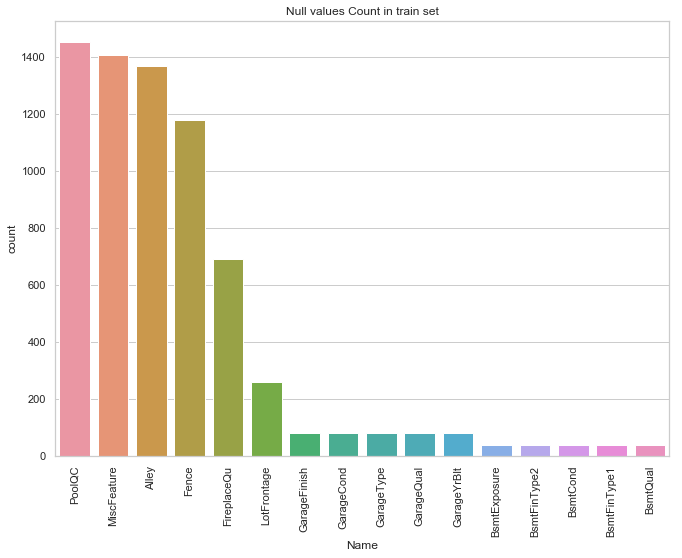

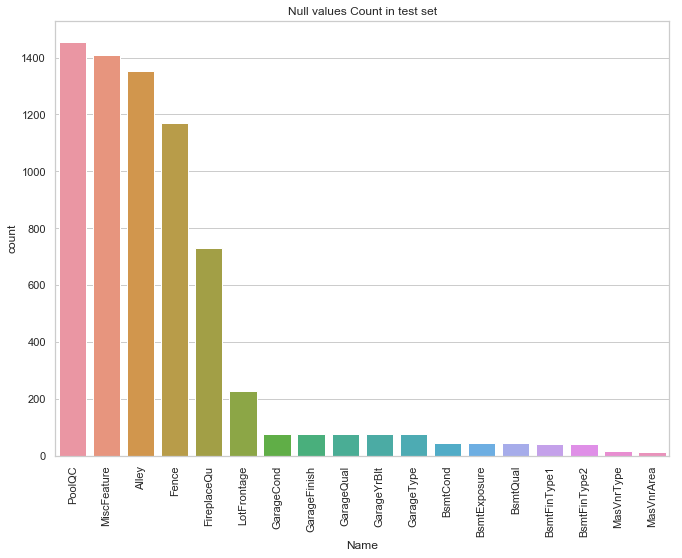

In [75]:
match=0
for i in list(train.columns):
    for j in list(test.columns):
        if i==j:
            match=match+1
            
if match==len(list(test.columns)):
    print("---All the Attributes are same in both train and test datasets.")
else:
   print("---All the Attributes are Not same in both train and test datasets.") 
    
        
NAN_train = train.isnull().sum().sort_values(ascending = False)
NAN_test =  test.isnull().sum().sort_values(ascending = False)
def Null_counts(null,title):
    miss= null
    miss=miss[miss>10]
    miss = miss.to_frame()
    miss.columns = ['count']
    miss.index.names = ['Name']
    miss['Name'] = miss.index

    ##########plot the missing value count
    rcParams['figure.figsize'] = 11.0,8.0
    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(x = 'Name', y = 'count', data=miss)
    plt.xticks(rotation = 90)
    plt.title('Null values Count in ' + title +' set')
    plt.show()
Null_counts(NAN_train,'train')
Null_counts(NAN_test,'test')


# 4. Types of Data Visualization:
<span style="color:black; font-family:Georgia; font-size:01em;">There are three types of data in the Kaggle House Price Datasets. They are Numerical(Continuous Or Discrete), Categorical(Regarded as Nominal) and Ordinal(features with ranking). These three types of data can be observed in the following table. We also split our data into these three parts for feature manipulation. Later some important features are extracted from the database. 

In [76]:
all_feat= list(train.columns)
all_numerical_features = list(train.select_dtypes(exclude = ['object']).columns)
all_categorical_features = list(train.select_dtypes(include = ["object"]).columns)

ord_cat_features = ['LotShape','Utilities','LandSlope','OverallCond', 'OverallQual','ExterCond', 'ExterQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual',
                  'HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']

print("Total number of Ordinal Features",len(ord_cat_features))
##There are some features which is actually Nominal but given intege so we can transform them to Nominal/categorical
t = Texttable()
t.add_rows([['Types Of feature', 'Name of Features'], ['Numerical', all_numerical_features], ['Categoricals', all_categorical_features],
           ['Ordinal',ord_cat_features]])
print(t.draw())

Total number of Ordinal Features 23
+------------------+-----------------------------------------------------------+
| Types Of feature |                     Name of Features                      |
+==================+===========================================================+
| Numerical        | ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr',     |
|                  | 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath',               |
|                  | 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch',             |
|                  | 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',     |
|                  | 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr',   |
|                  | 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass',   |
|                  | 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',         |
|                  | 'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice',    |
|                  | 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF',       

<span style="color:black; font-family:Georgia; font-size:01em;">In normal sense Ordinal data is categorical(based on string). There two attributes which are basically numerical . They are 'OverallCond', 'OverallQual'. 

In [77]:
###Now we will just work for Categorical and Ordinal features only
col1=ord_cat_features
col2=all_categorical_features
set1 = set(col1)
set2 = set(col2)
missing = list(sorted(set1 - set2))
added = list(sorted(set2 - set1))
print('missing:', missing)
print('added:', added)


missing: ['OverallCond', 'OverallQual']
added: ['Alley', 'BldgType', 'CentralAir', 'Condition1', 'Condition2', 'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType', 'Heating', 'HouseStyle', 'LandContour', 'LotConfig', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street']


In [78]:
Nominal_features=added
ordinal_but_numerical=missing

### Looking for Correlation
<span style="color:black; font-family:Georgia; font-size:1em;">Using Correlation we can find the relation between each features. We can see which feature contribute more for the SalePrice

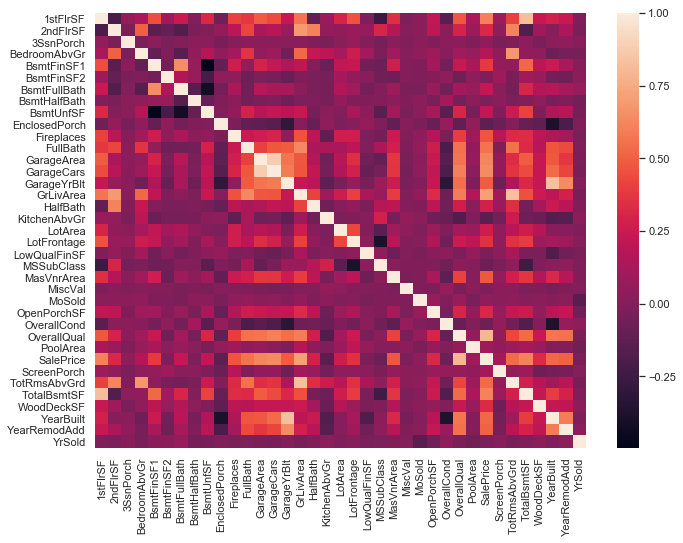

In [79]:
all_numerical =train.select_dtypes(include=[np.number])
corr = all_numerical.corr()
rcParams['figure.figsize'] = 11.0,8.0
sns.heatmap(corr)

# 4.1 Outlier in  Data
<span style="color:black; font-family:Georgia; font-size:1em;">It can be seen that from the figure below Lot Area after 150000 has some outliers. ‘GrLivArea’ has outliers after 4000 square feet. 'BsmtFinSF1' has outlier values after 4500 and Other Outlier is clearly be seen from the Figures plotted below. These Outlier must be eliminated before feeding into the machine learning model.</span>

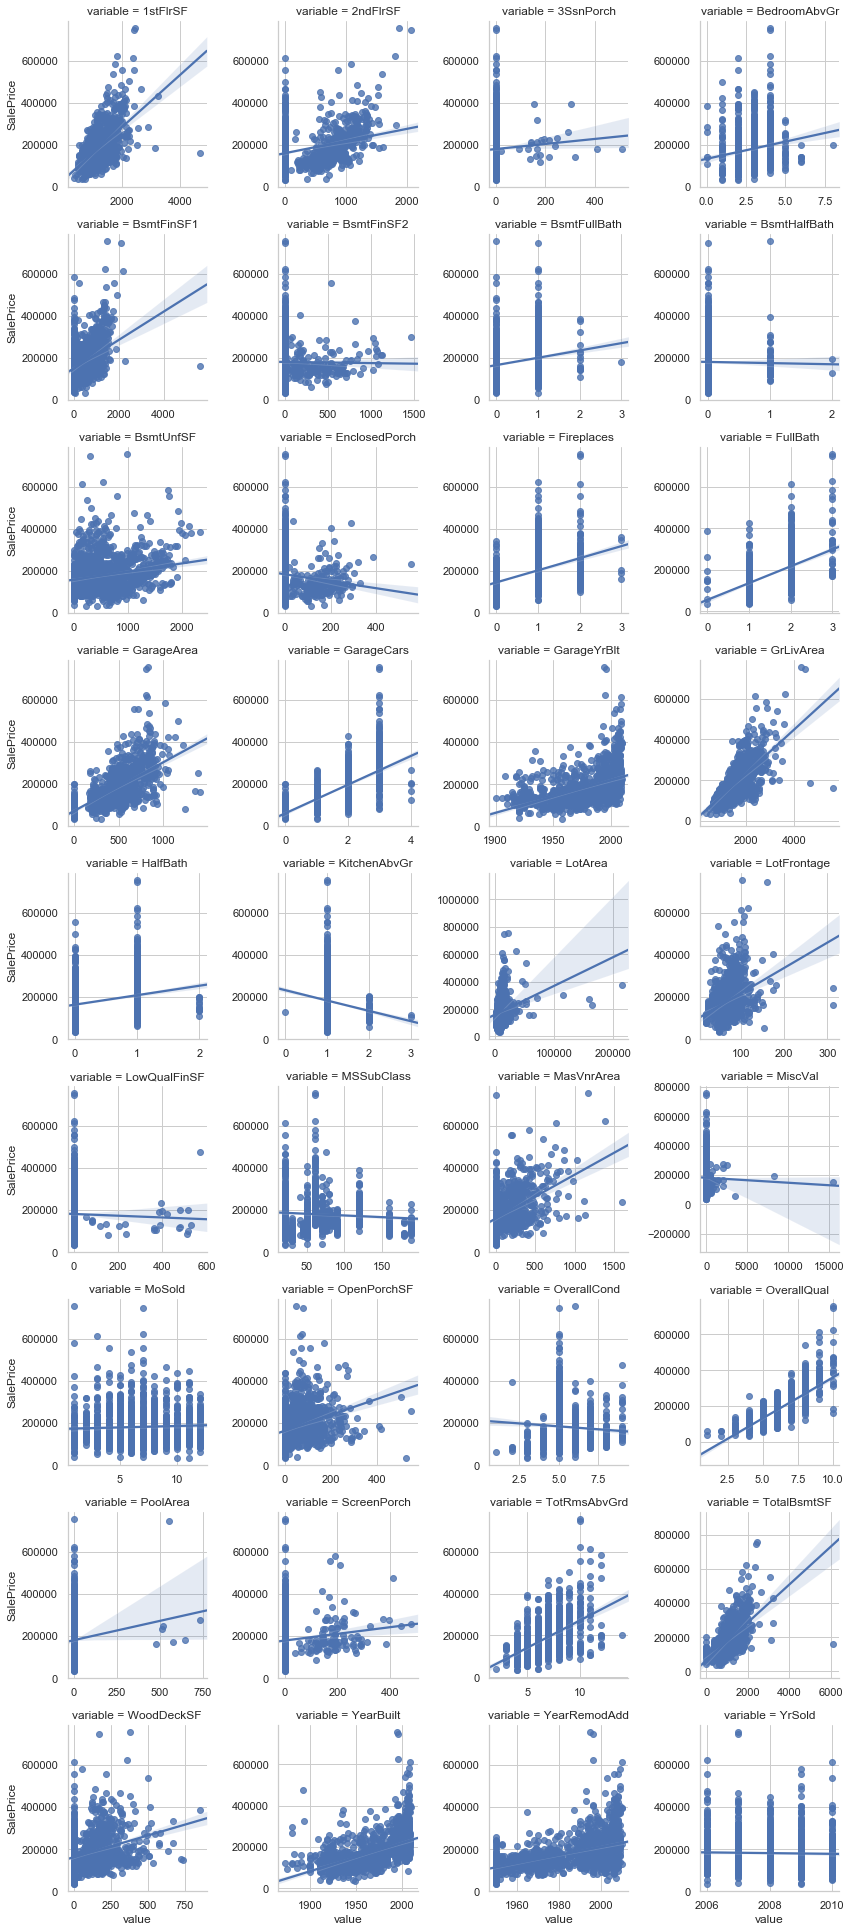

In [80]:
def plotting_outlier(train,features):
    num_melt = pd.melt(train, id_vars=['SalePrice'], 
                       value_vars = [f for f in features if f not in ['Id', 'SalePrice']])
    g = sns.FacetGrid(data=num_melt, col="variable", col_wrap=4, sharex=False, sharey=False)
    return g
g_num_reg=plotting_outlier(train,all_numerical_features)
g_num_reg.map(sns.regplot, 'value', 'SalePrice')


def outlier_elimination(feat,thrshld):
    train.drop(train[train[feat] > thrshld].index , inplace=True)
    return train
Outlier_feat=['LotArea','BsmtFinSF1','TotalBsmtSF','MiscVal','PoolArea']
outlier_threshold=[150000,4500,6000,15000,600]

for feature,threshold in zip(Outlier_feat,outlier_threshold):
     outlier_elimination(feature,threshold)

Text(0, 0.5, 'SalePrice')

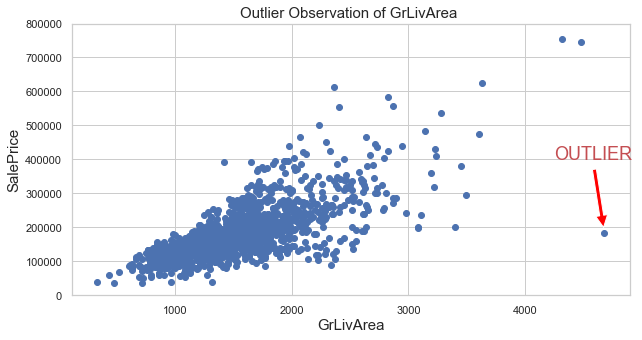

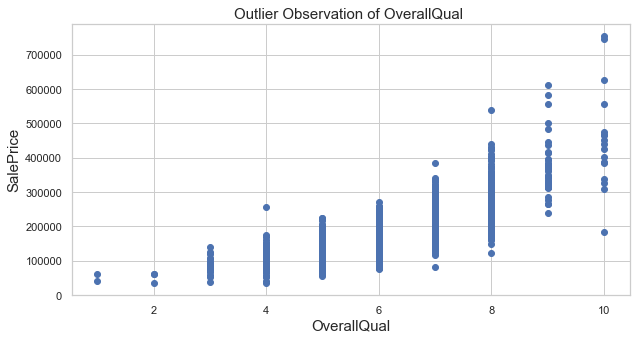

In [81]:
plt.figure(figsize=(10,5))
plt.scatter(x=train.GrLivArea, y=train.SalePrice)
plt.title("Outlier Observation of GrLivArea ", fontsize=15)
plt.xlabel("GrLivArea", fontsize=15)
plt.ylabel("SalePrice", fontsize=15)
plt.annotate('OUTLIER', fontsize=18,color='r', xy=(4675, 190000), xytext=(4250, 400000),
            arrowprops=dict(facecolor='Red', shrink=0.05))
plt.ylim(0,800000)

plt.figure(figsize=(10,5))
plt.title("Outlier Observation of OverallQual ", fontsize=15)
plt.scatter(x=train.OverallQual, y=train.SalePrice )
plt.xlabel("OverallQual", fontsize=15)
plt.ylabel("SalePrice", fontsize=15)

In [82]:
train.drop(train[(train["GrLivArea"]>4000)&(train["SalePrice"]<300000)].index,inplace=True)
train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, inplace=True)

##  4.2 Observing SalePrice Outlier  
<span style="color:black; font-family:Georgia; font-size:1em;">we can see that from SalePrice distribution there are outlier values after 700000. So we can eliminate these values because due to outlier model performance becomes reduced.

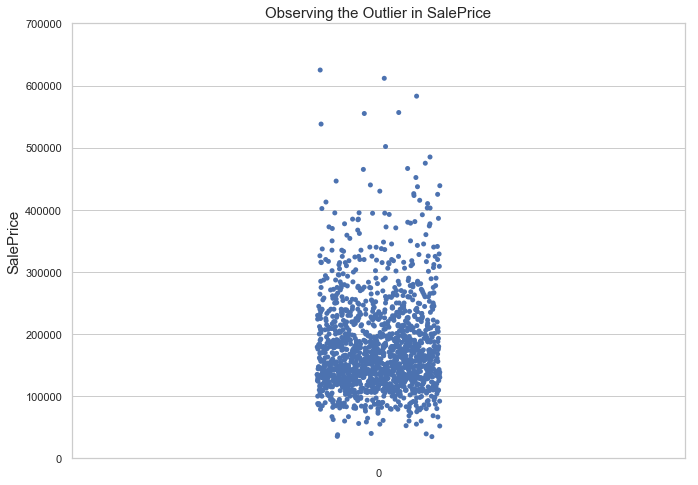

In [83]:
sns.stripplot(data=train.SalePrice, jitter=True)
plt.ylim(0,700000)
plt.ylabel("SalePrice", fontsize=15)
plt.title("Observing the Outlier in SalePrice", fontsize=15)
train.drop(train[train.SalePrice > 700000].index, inplace=True)



##  4.3 Observing SalePrice Distribution  
<span style="color:black; font-family:Georgia; font-size:1em;">Now we will observe the distribution of SalePrice of given datasets. It's seen that distribution is rightly skewed with skewness 1.8828. To make better modelling and make good relationship between the features and Sale price it is necessary to make the Sale Price normally distributed as close as possible. So we perform log transformation on Sale Price. This can be seen in following figure.
    
### why Normal Distribution required: 
<span style="color:black; font-family:Georgia; font-size:1em;"> A question can be raised why we are looking for Normally distributed attributes. Because Normal distributions are defined by two parameters, the mean (μ) and the standard deviation (σ). The mean, median, and mode of a normal distribution are equal. It is known that approximately 95% of the area of a normal distribution is within two standard deviations of the mean. So if we can make the attributes normal distribution then the chance of having outliers is less. </span>

<Figure size 792x576 with 0 Axes>

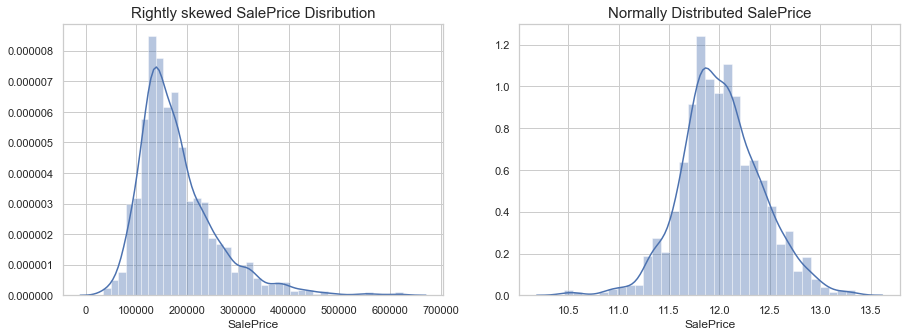

<Figure size 792x576 with 0 Axes>

In [84]:
fig, (f1, f2) = plt.subplots(1, 2, figsize=(15, 5))
f1.set_title("Rightly skewed SalePrice Disribution",fontsize=15)
sns.distplot(train['SalePrice'], ax =f1)
sns.distplot(np.log1p(train['SalePrice']), ax=f2)
plt.title("Normally Distributed SalePrice", fontsize=15)
plt.figure()

# 5. Concatenating both dataset:
<span style="color:black; font-family:Georgia; font-size:01em;">We will merge the both datasets for the betterment of imputation. An important thing to notice that the train and test data has been merged together only to impute the NAN values using the characteristics of train data. But it is ensured that test dataset has not been manipulated because test data is unseen for us. As a result it is not allowed to manipulate test dataset. There are some feature which are actually categorical but given in integer form, so we convert them into string.</span>

In [85]:
full=pd.concat([train,test], ignore_index=True)
full['MSSubClass'] = full['MSSubClass'].apply(str)
full['YrSold'] = full['YrSold'].astype(str)
full['MoSold'] = full['MoSold'].astype(str)

# 6. Null Handling
## Where NAN means category "None"
<span style="color:black; font-family:Georgia; font-size:01em;">There are some features where NAN values carries meaningful information. There are features which give information about Basement, Garage, Fireplace and Pool. In these types of features NAN values means the there is no Garage in that house or there are no pool, fireplaces etc.We have Basement, Garage,Fireplaces and Pool types of features where NAN means there is no value at that particular position. These types of features are 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'Fireplaces', 'FireplaceQu', 'PoolArea', 'PoolQC' .So, in my case I have imputed ‘0’ if the feature is Numerical and put “None” when the feature is categorical. The meaning of ‘0’ is it has no garage, pool, fireplaces etc and “None” represents the same thing but in non numeric sense. Without writing them manually we can find these features by a simple token 'Bsmt', 'Garage' etc from the datasets. </span>

In [86]:
look_for=['Bsmt','Garage','Fire']
look_for_feat=[]
for i in look_for:
    for j in all_feat:
        if i in j:
            look_for_feat.append(j)
            
look_for_feat.remove("GarageYrBlt")
print("Basement and Garage Related Features are : ", look_for_feat)
for i in range(len(look_for_feat)):
    check=(look_for_feat[i] in all_categorical_features)*1
    if check==1:
        full[look_for_feat[i]].fillna("None",inplace=True)
    else:
        full[look_for_feat[i]].fillna(0,inplace=True) 

full['GarageYrBlt'] = full['GarageYrBlt'].fillna(full['YearBuilt'])
full.fillna({'MasVnrType':"None",
                     'MasVnrArea': 0.0,
                     'Fence':"None",
                     'Alley': "None"
                     },inplace=True)

Basement and Garage Related Features are :  ['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'FireplaceQu', 'Fireplaces']


# 7. Splitting data on the basis of Types:
### As first we are splitting the data into ordinal and nominal

In [87]:
full_ord=full[ord_cat_features]
full_nom=full[Nominal_features+['MSSubClass','YrSold','MoSold']]

# Checking Null values in Ordinal feature:



In [88]:
ordinal_feat_null=full_ord.columns[full_ord.isna().any()].tolist()
print(ordinal_feat_null)

['Utilities', 'Electrical', 'KitchenQual', 'Functional', 'PoolQC']


Above features have null values in ordinal category of data. As the category is ordinal so it is likely to be imputed by such a value which occurs maximum in the dataset. 

In [89]:
full_ord['Electrical'] = full_ord['Electrical'].fillna(full_ord['Electrical'].mode()[0])
full_ord['KitchenQual'] = full_ord['KitchenQual'].fillna(full_ord['KitchenQual'].mode()[0])
full_ord["Functional"] = full_ord["Functional"].fillna(full_ord['Functional'].mode()[0])
full_ord["Utilities"] = full_ord["Utilities"].fillna(full_ord['Utilities'].mode()[0])

In [90]:
now_null=full_ord.columns[full_ord.isna().any()].tolist()
print(now_null)

['PoolQC']


# 7.1 Feature Engineering for Ordinal Data:
<span style="color:black; font-family:Georgia; font-size:1em;"> Basically ordinal features represent the ranking of element of that specific feature. For example, we have shirt size XXL, XL, M, S etc. here these elements carrying the information about how large or how small a shirt is. So we can give some ranking to these element like XXL:1, XL:2, M:3,S:4 etc. This exactly what we have done in House price case. We have around 23 ordinal features and ranked them according to their Median Sale Price. 
Among 23 ordinal features we can show some of the features in above figure. In Figure: A Sale Price is increasing with respect to Overall Quality of the House. In Fig C ‘Ex’ represents the highest Sale Price and ‘Po’ represent the lowest Sale Price and there are total 5 unique elements in HeatingQC feature. So we can encode them in following way:
{‘Ex’:1, ‘Gd’:2, ‘TA’:3, ‘Fa’:4, ‘Po’:5}. The logic behind above encoding is ‘Ex’ is representing the maximum Sale Price followed by ‘Gd’ and so on. Actually we created a rank to a particular feature and represent them with a value in descending order.
</span>

In [91]:
def pivot_table(df, attribute, plot=False):
    pivot = df.pivot_table(index=attribute, values='SalePrice', aggfunc=np.mean)
    if plot == False:
        return pivot.sort_values(["SalePrice"],ascending=False)
    else:
        return (pivot.plot(kind='bar', color='blue') , pivot.sort_values(["SalePrice"],ascending=False))

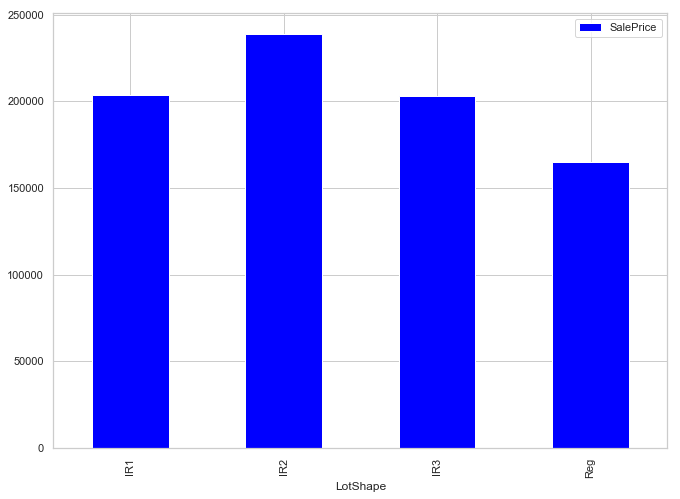

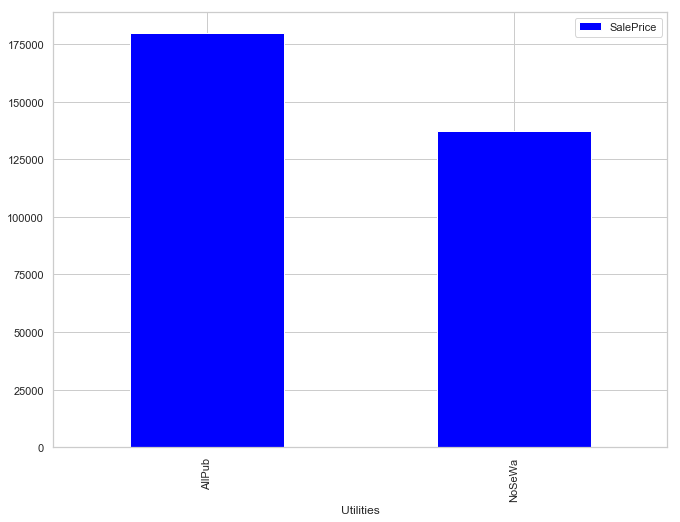

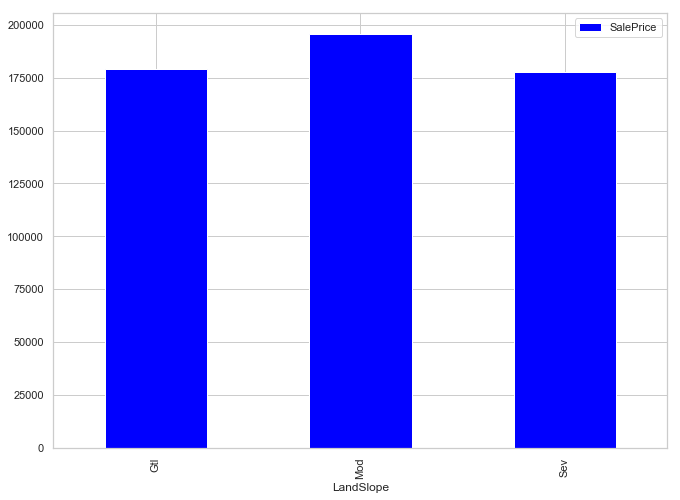

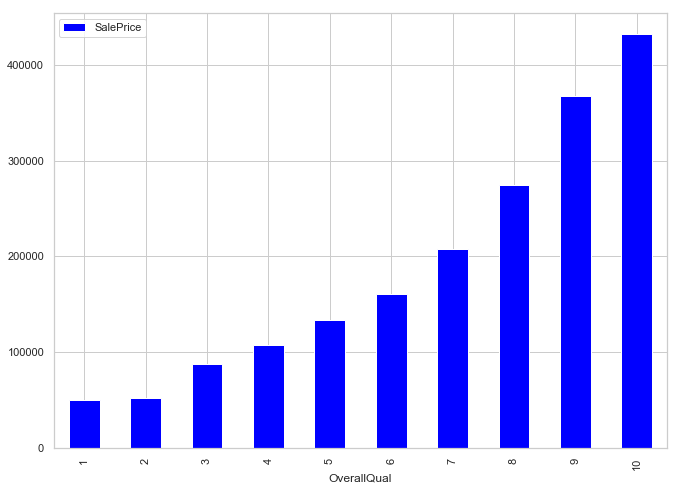

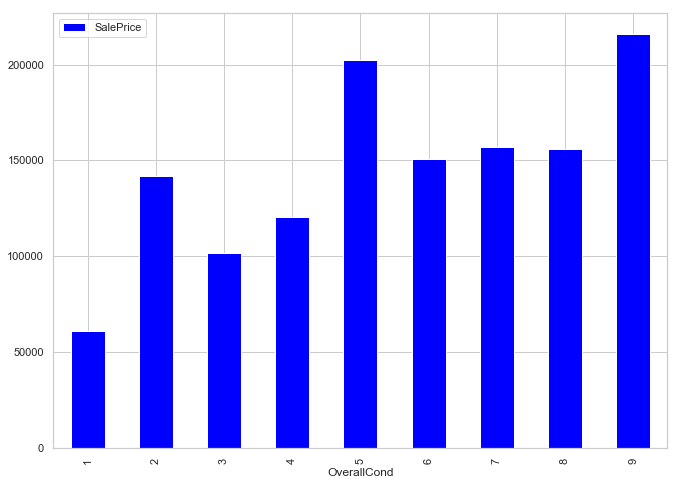

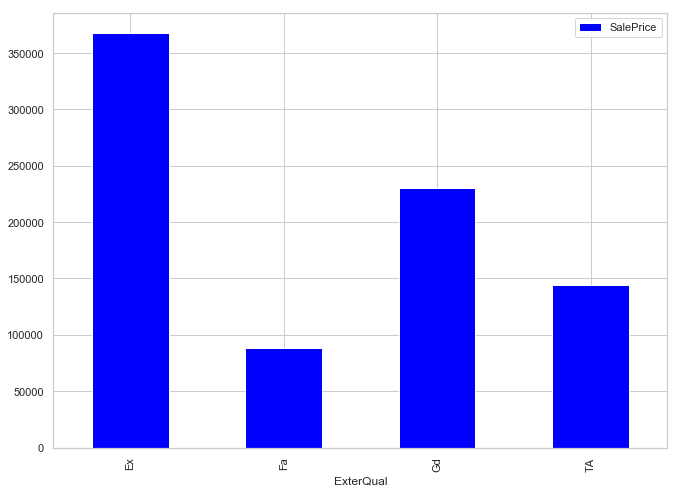

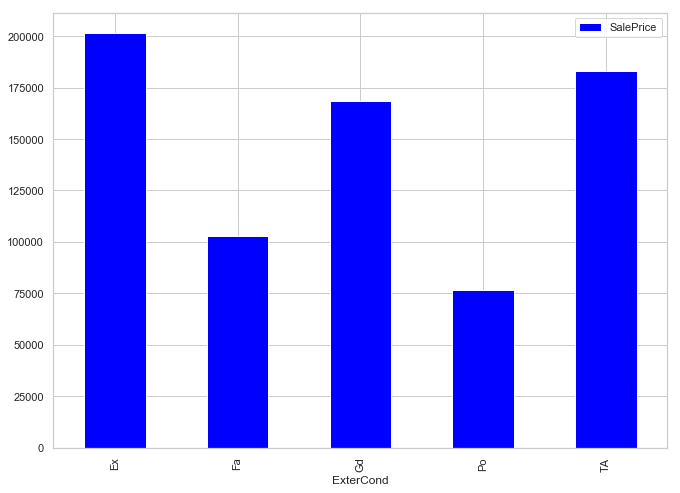

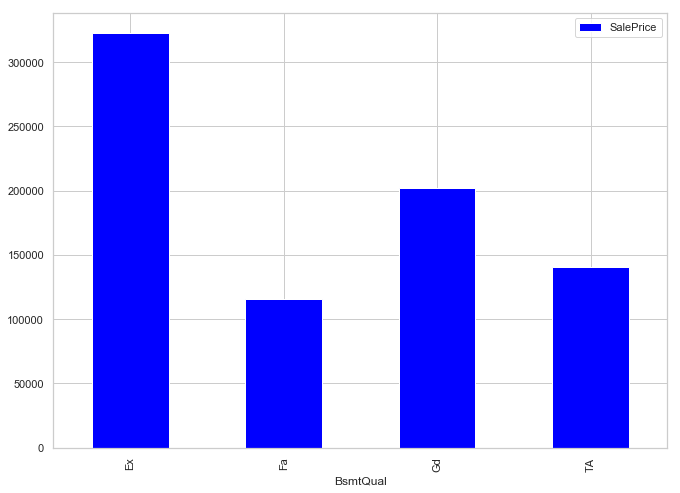

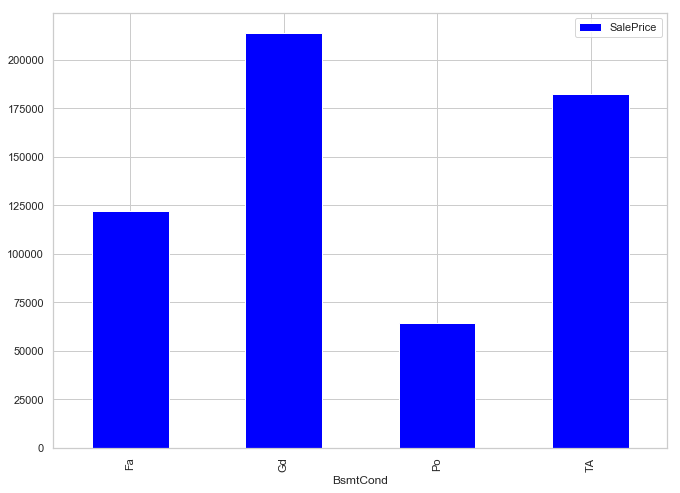

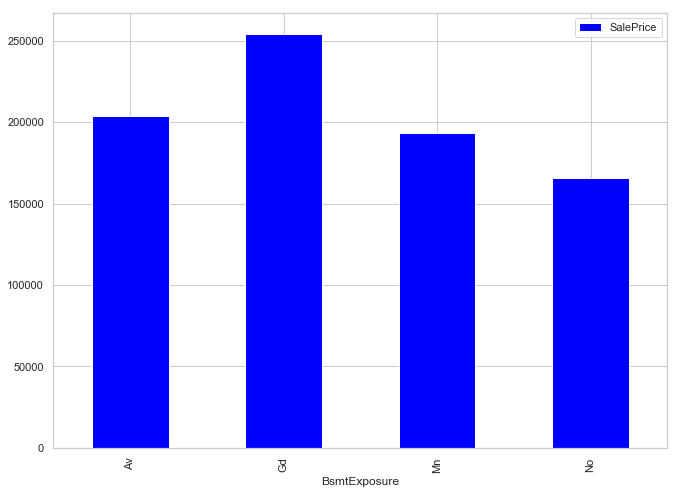

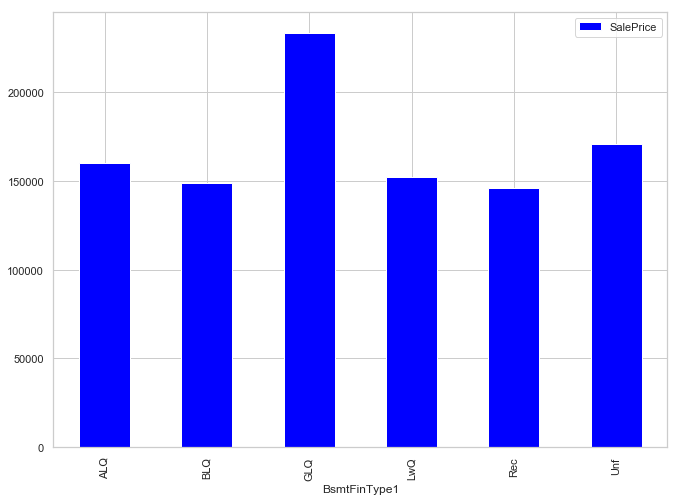

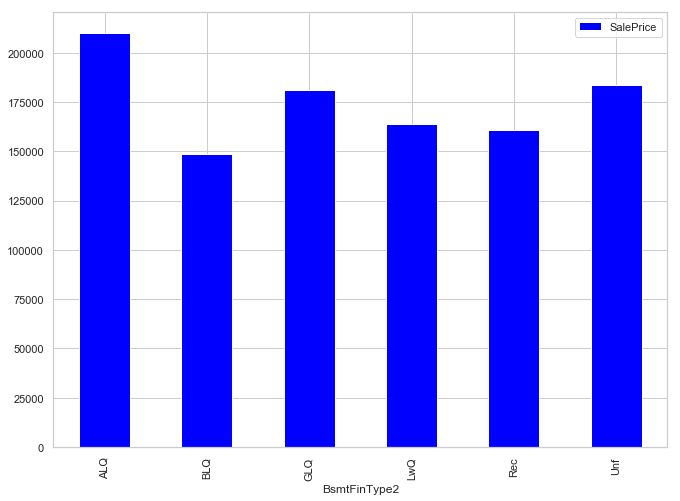

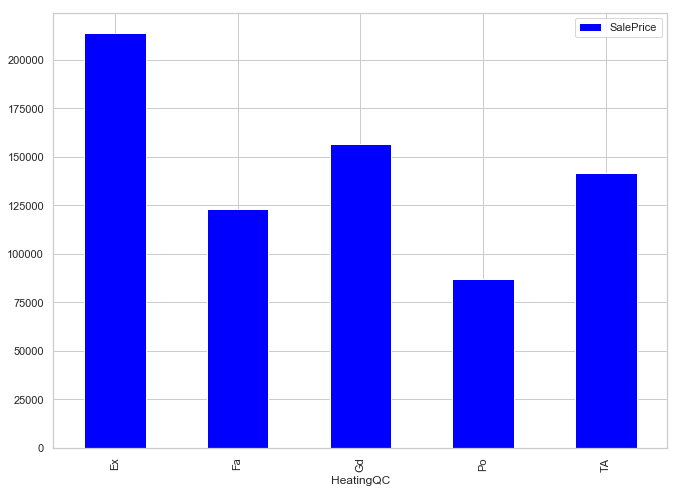

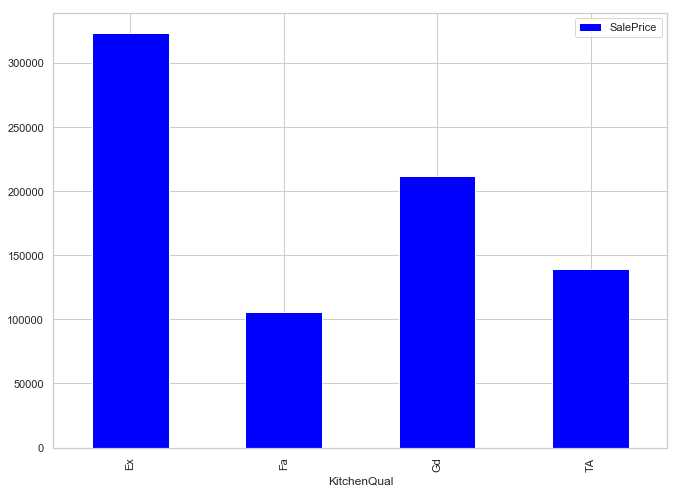

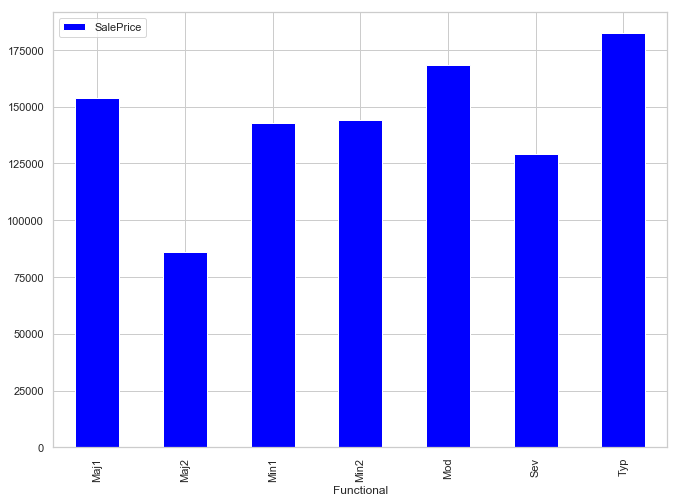

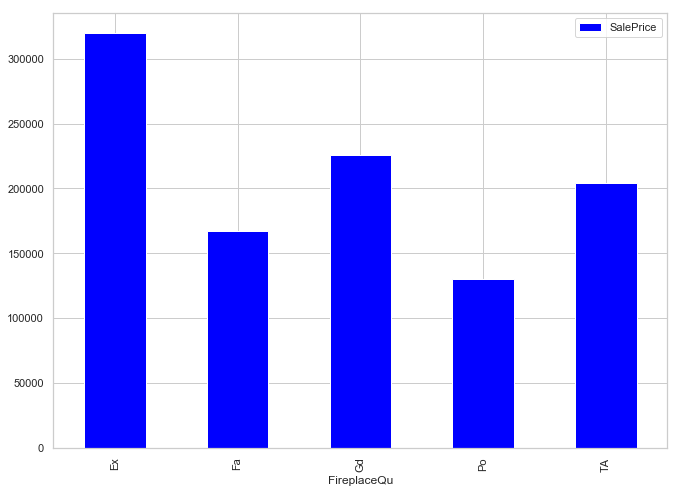

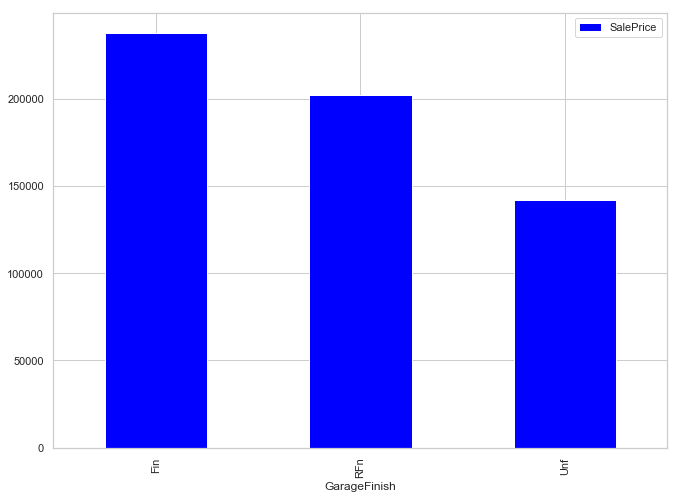

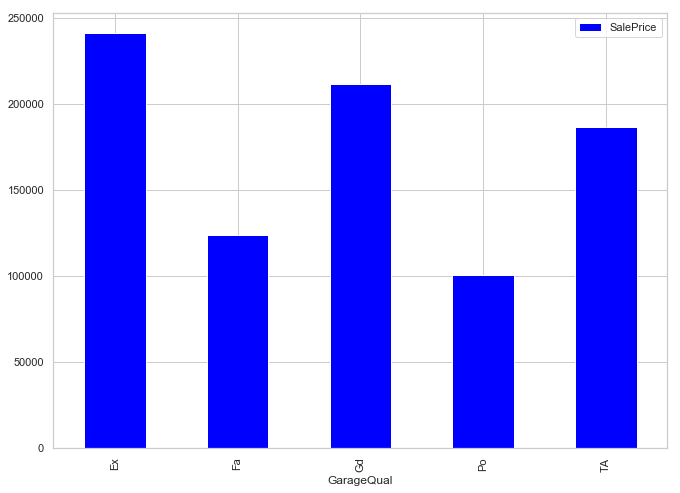

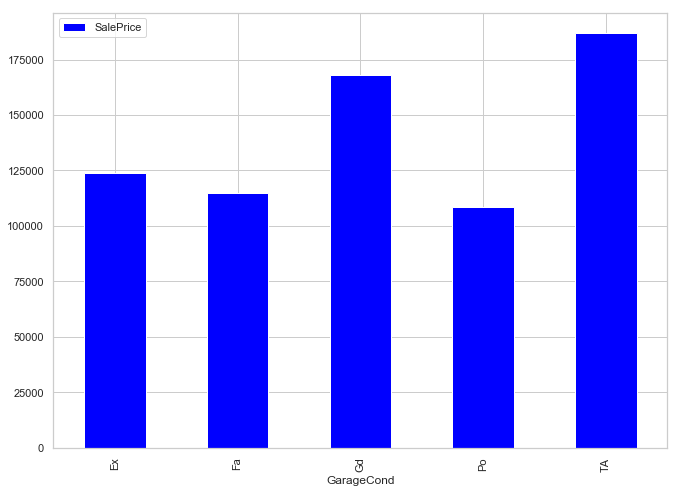

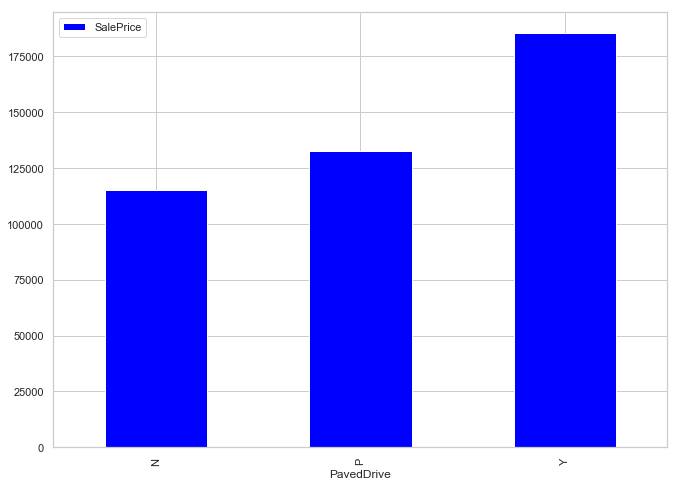

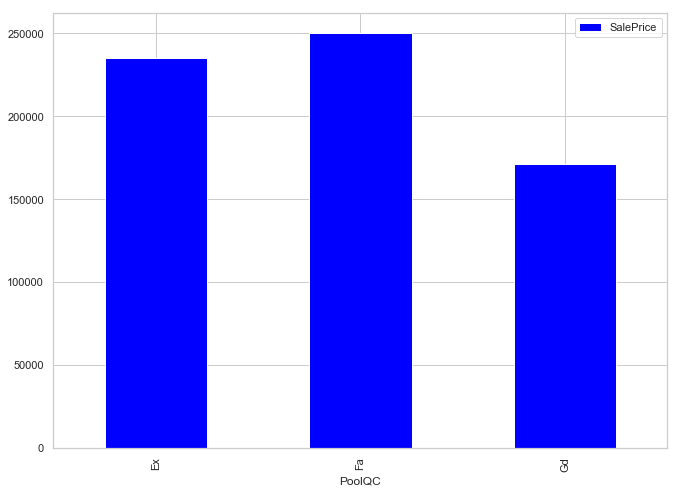

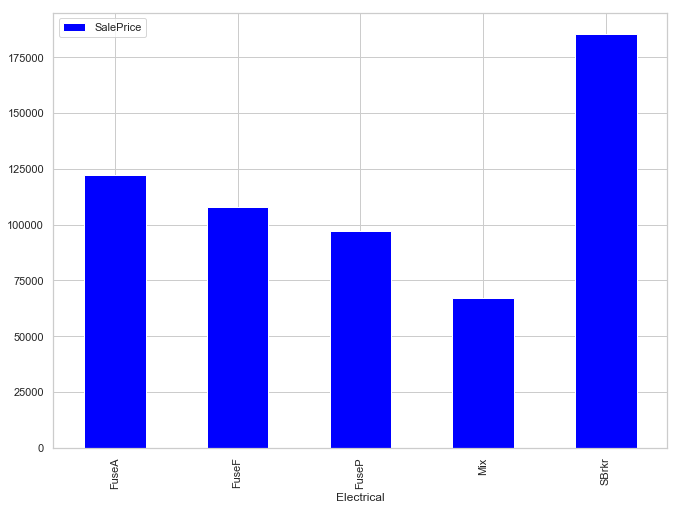

In [92]:
Oridinal=['LotShape','Utilities','LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',
          'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
          'GarageCond','PavedDrive','PoolQC','Electrical']

for p in Oridinal:
    pivot_table(train,p,plot=True)

(<matplotlib.axes._subplots.AxesSubplot at 0x1e4d0753588>,
             SalePrice
 YrSold               
 2007    182412.120370
 2006    182258.205128
 2009    178851.783383
 2010    177393.674286
 2008    176985.863787)

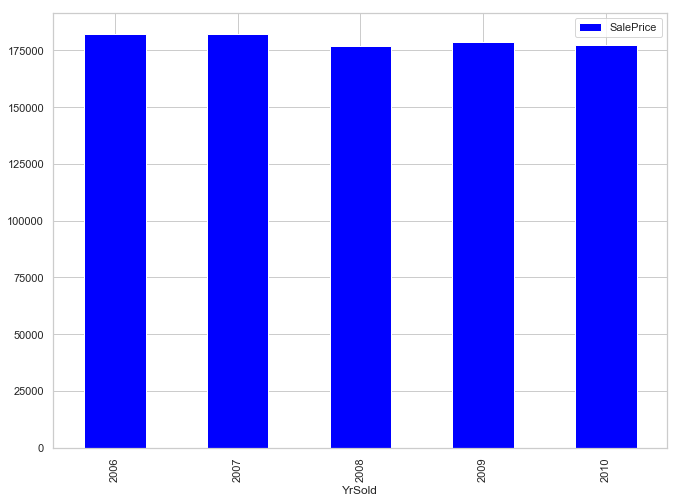

In [93]:
pivot_table(full.iloc[:len(train),:], 'YrSold', plot=True)

# Feature Engineering for ordinal data in following way:
# If the SalePrice is in following range then that value is replaced by:
| serial | Condition | Imputed Values |
| --- | --- | --- |
| 1 | <100000 | 0 | 
| 2 | 100000<x<130000 | 1 | 
| 3 | 130000<x<160000 | 2 | 
| 4 | 160000<x<190000 | 3 | 
| 5 | 190000<x<220000 | 4 | 
| 6 | 220000<x<250000 | 5 |
| 7 | 250000<x<280000 | 6 | 
| 8 | 280000<x<310000 | 7 | 
| 9 | 310000<x<340000 | 8 |
| 10 | 340000<x<370000 | 9 |
| 11 | 370000<x<400000 | 10 |
| 12 | 400000<x<430000 | 11 |
| 13 | 430000<x<460000 | 12|
| 14 | x>460000 | 13 | 

#### Where 'x' represent the SalePrice . The Ranking will verify that which value represent good category, average category or poor.

In [94]:
###Ordinal
full_ord["LotShapeRegular"] = (full_ord["LotShape"] == "Reg") * 1
full_ord["LotShape"]= full_ord['LotShape'].map({"Reg":3, "IR1":4, "IR3":4, "IR2":5})

full_ord["PublicUtilities"]=(full_ord["Utilities"]=="AllPub")*1
full_ord["Utilities"]=full_ord['Utilities'].map({"AllPub":3,"NoSeWa":2})

full_ord["ISRegLandSlope"] = ((full_ord["LandSlope"] == "Gtl") | (full_ord["LandSlope"] == "Mod")) * 1
full_ord["LandSlope"]=full_ord["LandSlope"].map({"Sev":4,"Mod":4,"Gtl":3})
full_ord["OverallQual"] = full_ord.OverallQual.map({1 : 0, 2 : 0, 3 : 0, # poor
                                                      4 : 1, 5 : 2, 6 : 2, # average
                                                      7 : 4, 8 : 6, 9 : 9, 10 : 13 # good
                                                     })
full_ord["OverallCond"] = full_ord.OverallCond.replace({1 : 0, 2 : 2, 3 : 1,
                                                      4 : 1, 5 : 4, 6 : 2, 
                                                      7 : 2, 8 : 2, 9 : 4 
                                                     })
full_ord["IsGoodOverallQual"]=(full_ord['OverallQual']>=5)*1
full_ord['FireplaceQu'] = full_ord['FireplaceQu'].map({"None":0, "Po":1, "Fa":2, "TA":4, "Gd":5, "Ex":8})
full_ord['GarageCond'] = full_ord['GarageCond'].map({"None":0, "Po":1, "Fa":1, "TA":3, "Gd":3, "Ex":1})
full_ord['GarageQual'] = full_ord['GarageQual'].map({"None":0, "Po":1, "Fa":1, "TA":3, "Gd":4, "Ex":5})
full_ord['BsmtCond'] = full_ord['BsmtCond'].map({"None":0, "Po":0, "Fa":1, "TA":3, "Gd":4})
full_ord['BsmtQual'] = full_ord['BsmtQual'].map({"None":1, "Fa":1, "TA":2, "Gd":4, "Ex":8})
full_ord['ExterQual'] = full_ord['ExterQual'].map({ "Po":1, "Fa":0, "TA":2, "Gd":5, "Ex":9})
full_ord['ExterCond'] = full_ord['ExterCond'].map({"None":0, "Po":0, "Fa":1, "TA":3, "Gd":3, "Ex":4})
full_ord["BadHeating"] = full_ord['HeatingQC'].replace({'Ex': 0, 'Gd': 0, 'TA': 0, 'Fa': 1, 'Po': 1})
full_ord['HeatingQC'] = full_ord['HeatingQC'].map({"None":0, "Po":0, "Fa":1, "TA":2, "Gd":2, "Ex":4})
full_ord['GarageFinish'] = full_ord['GarageFinish'].map({"None":1, "Unf":2, "RFn":4, "Fin":5})
full_ord['Functional']= full_ord['Functional'].map({"Maj2":0,"Sev":1, "Maj1":2 , "Min1":2,"Min2":2,"Mod":3,"Typ":3})
full_ord['KitchenQual'] = full_ord['KitchenQual'].map({"Fa":1, "TA":2, "Gd":4, "Ex":8})
full_ord['BsmtExposure'] = full_ord['BsmtExposure'].map({"None":1, "No":3, "Mn":3, "Av":4, "Gd":6})
full_ord['BsmtFinType1'] = full_ord['BsmtFinType1'].map({"None":1, "Unf":3, "LwQ":2, "Rec":2, "BLQ":2, "ALQ":2,"GLQ":5})
full_ord['BsmtFinType2'] = full_ord['BsmtFinType2'].map({"None":1, "Unf":3, "LwQ":3, "Rec":3, "BLQ":2, "ALQ":4,"GLQ":3})
full_ord["ISPavedDrive"] = (full_ord["PavedDrive"] == "Y") * 1
full_ord['PavedDrive'] = full_ord['PavedDrive'].map({"Y":3, "P":2, "N":1})
full_ord.drop('PoolQC', axis=1, inplace=True)
full_ord["IsElectricalSBrkr"] = (full_ord["Electrical"] == "SBrkr") * 1
full_ord['Electrical'] = full_ord['Electrical'].map({"Mix":0, "FuseP":0, "FuseF":1,"FuseA":1,"SBrkr":3})

full_ord['Fence'] = full_ord['Fence'].map({"None":3, "MnWw":1, "MnPrv":2, "GdPrv":3, "GdWo":2})
full_ord["GarageGrade"] = full_ord["GarageQual"] * full_ord["GarageCond"]
# Overall quality of the exterior
full_ord["ExterGrade"] = full_ord["ExterQual"] * full_ord["ExterCond"]


In [95]:
full_ord.head()
print(full_ord.shape)

(2908, 31)


In [96]:
now_null=full_ord.columns[full_ord.isna().any()].tolist()
print(now_null)

[]


# 8. Dealing with Nominal Feature:
### Observing Null values in Nominal category of data:

In [97]:
nominal_feat_null=full_nom.columns[full_nom.isna().any()].tolist()
print(nominal_feat_null)

['Exterior1st', 'Exterior2nd', 'MSZoning', 'MiscFeature', 'SaleType']


<span style="color:black; font-family:Georgia; font-size:1em;"> 'Exterior1st', 'Exterior2nd','MSZoning', 'SaleType' features have been filled with maximum repeated values where null occurs. 'MiscFeature' is eliminated as it contains more null values and doesn't carry any useful information which can affect pricing. One hot encoding is accomplished for all the nominal features as we are going to use artificial neural network and one hot enocoding is robust to ANN.

In [98]:
full_nom['Exterior1st'] = full_nom['Exterior1st'].fillna(full_nom['Exterior1st'].mode()[0])
full_nom['Exterior2nd'] = full_nom['Exterior2nd'].fillna(full_nom['Exterior2nd'].mode()[0])
full_nom['SaleType'] = full_nom['SaleType'].fillna(full_nom['SaleType'].mode()[0])
full_nom.fillna({'MSZoning' : train['MSZoning'].value_counts().index[0] }, inplace=True)
full_nom.drop(['MiscFeature'],axis=1, inplace=True)
nominal_dummies_col=list(full_nom.columns)
nominal_dummies=pd.DataFrame()
nominal_dummies = pd.get_dummies(full_nom[nominal_dummies_col],columns=nominal_dummies_col)

In [99]:
nominal_feat_null=full_nom.columns[full_nom.isna().any()].tolist()
print(nominal_feat_null)

[]


In [100]:
print(Nominal_features)

['Alley', 'BldgType', 'CentralAir', 'Condition1', 'Condition2', 'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType', 'Heating', 'HouseStyle', 'LandContour', 'LotConfig', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street']


(<matplotlib.axes._subplots.AxesSubplot at 0x1e4cd26b2b0>,
                   SalePrice
 Neighborhood               
 NridgHt       316270.623377
 NoRidge       314028.410256
 StoneBr       310499.000000
 Timber        238929.250000
 Veenker       238772.727273
 Somerst       225379.837209
 Crawfor       210624.725490
 ClearCr       208416.615385
 CollgCr       197965.773333
 Blmngtn       194870.882353
 Gilbert       192854.506329
 NWAmes        189161.875000
 SawyerW       186555.796610
 Mitchel       156270.122449
 NAmes         145821.843750
 NPkVill       142694.444444
 SWISU         142591.360000
 Blueste       137500.000000
 Sawyer        136793.135135
 OldTown       128225.300885
 Edwards       125796.391753
 BrkSide       124834.051724
 BrDale        104493.750000
 IDOTRR        100123.783784
 MeadowV        98576.470588)

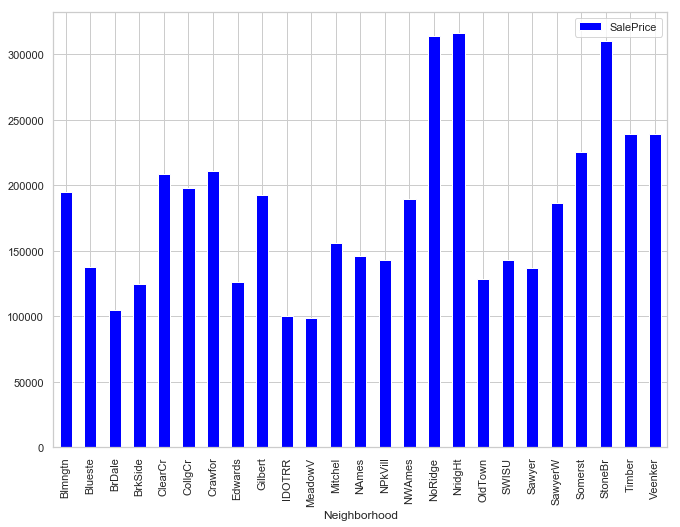

In [101]:
pivot_table(full.iloc[:1460,:],'Neighborhood', plot=True)

# Engineering for Nominal data:
<span style="color:black; font-family:Georgia; font-size:1em;"> We have already performed one hot encoding for nominal features. Now we will also perform other feature engineering for the Nominal data. This will be done same as what we have previously done in  ordinal features.

| serial | Condition | Imputed Values |
| --- | --- | --- |
| 1 | <100000 | 0 | 
| 2 | 100000<x<130000 | 1 | 
| 3 | 130000<x<160000 | 2 | 
| 4 | 160000<x<190000 | 3 | 
| 5 | 190000<x<220000 | 4 | 
| 6 | 220000<x<250000 | 5 |
| 7 | 250000<x<280000 | 6 | 
| 8 | 280000<x<310000 | 7 | 
| 9 | 310000<x<340000 | 8 |
| 10 | 340000<x<370000 | 9 |
| 11 | 370000<x<400000 | 10 |
| 12 | 400000<x<430000 | 11 |
| 13 | 430000<x<460000 | 12|
| 14 | x>460000 | 13 | 


#### Where 'x' represent the SalePrice . The Ranking will verify that which value represent good category, average category or poor.

In [102]:
full_nom['Alley'] = full_nom['Alley'].map({"Grvl":1, "Pave":2, "None":3})
full_nom['BldgType'] = full_nom['BldgType'].map({"2fmCon":1, "Duplex":1, "Twnhs":1,"TwnhsE":3,"1Fam":3})
full_nom['CentralAir']=full_nom['CentralAir'].map({"N":1,"Y":3})
full_nom['Condition1']=full_nom['Condition1'].map({"Artery": 2, "RRAe":2,"Feedr":2,"RRAn":3,"Norm":3,"RRNe":3 , 
                                                   "RRNn":4,"PosN":4,"PosA":5  })
full_nom['Condition2']=full_nom['Condition2'].map({"Artery": 1, "RRAe":3,"Feedr":1,"RRAn":2,"Norm":3,"RRNe":3 , 
                                                   "RRNn":0,"PosN":6,"PosA":8  })
full_nom['Exterior1st']=full_nom['Exterior1st'].map({"BrkComm":0,"AsphShn":1,"CBlock":1,"AsbShng":1,"MetalSd":2,"Wd Sdng":2,
                                                    "WdShing":2,'Stucco':2,"HdBoard":2,"Plywood":3,"BrkFace":3,"VinylSd":4,
                                                    "CemntBd":4.2,"Stone":5,"ImStucc":5})

full_nom['Exterior2nd']=full_nom['Exterior2nd'].map({"Brk Cmn":1,"AsphShn":1,"CBlock":1,"AsbShng":1,"MetalSd":2,"Wd Sdng":2,
                                                    "WdShing":2,'Stucco':2,"HdBoard":2,"Plywood":2,"BrkFace":3,"VinylSd":4,
                                                    "CmentBd":5,"Stone":2,"ImStucc":5,'Other':7,"Wd Shng":2})


full_nom['Foundation']=full_nom['Foundation'].map({"Slab":1,"BrkTil":1,"CBlock":2,"Stone":2.1,"Wood":3,"PConc":4})
full_nom['GarageType'] = full_nom['GarageType'].map({"None":0,"2Types":2,"Attchd":4,"Basment":2,"BuiltIn":5,"CarPort":1,"Detchd":1.1})
full_nom['Heating']=full_nom['Heating'].map({'Floor':0,'Grav':0,'Wall':0,"OthW":1,"GasW":2.1,"GasA":3})
full_nom['HouseStyle']=full_nom['HouseStyle'].map({"1.5Unf":1,"SFoyer":1,"1.5Fin":1,"2.5Unf":2,"SLvl":2,
                                                  "1Story":3,"2Story":4,"2.5Fin":4})
full_nom['LandContour']=full_nom['LandContour'].map({'Lvl': 3, 'Bnk': 2, 'HLS': 5, 'Low': 4})

full_nom['LotConfig']=full_nom['LotConfig'].map({'Inside': 3, 'Corner': 3, 'CulDSac': 4.1, 'FR2': 3, 'FR3': 4})

full_nom['MSZoning']=full_nom['MSZoning'].map({'RL': 3, 'RM': 1, 'FV': 4, 'RH': 1, 'C (all)': 0})

full_nom['MasVnrType']=full_nom['MasVnrType'].map({'None': 2, 'BrkFace': 2, 'Stone': 6, 'BrkCmn': 2})

full_nom['RoofMatl']=full_nom['RoofMatl'].map({'CompShg': 3,
                                                 'Tar&Grv': 3,
                                                 'WdShngl': 10,
                                                 'WdShake': 5,
                                                 'Roll': 1,
                                                 'Metal': 3,
                                                 'Membran': 1,'ClyTile':2})
full_nom['RoofStyle']=full_nom['RoofStyle'].map({'Gable': 3, 'Hip': 4, 'Flat': 3, 'Gambrel': 2, 
                                                 'Mansard': 3, 'Shed': 4})
full_nom["SaleCondition_PriceDown"] = full_nom.SaleCondition.replace({'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1,
                                                                     'Normal': 0, 'Partial': 0})
full_nom["BoughtOffPlan"] = full_nom.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0,
                                                           "Family" : 0, "Normal" : 0, "Partial" : 1})
full_nom['SaleCondition']=full_nom['SaleCondition'].map({'Normal': 3,
                                                         'Partial': 6,
                                                         'Abnorml': 2,
                                                         'Family': 2,
                                                         'Alloca': 2,
                                                         'AdjLand': 1})
full_nom['SaleType']=full_nom['SaleType'].map({'WD': 3,
                                                 'New': 6,
                                                 'COD': 2,
                                                 'ConLD': 1,
                                                 'ConLw': 2,
                                                 'ConLI': 4,
                                                 'CWD': 4,
                                                 'Oth': 1,
                                                 'Con': 6})

full_nom['Street']=full_nom['Street'].map({'Pave': 3, 'Grvl': 1})


full_nom['Neighborhood']=full_nom['Neighborhood'].map({"MeadowV" : 0, "IDOTRR" : 1, "BrDale" : 1, "OldTown" : 1, "Edwards" : 1,
                   "BrkSide" : 1,"Sawyer" : 1, "Blueste" : 1, "SWISU" : 2, "NAmes" : 2, 
                   "NPkVill" : 2, "Mitchel" : 2, "SawyerW" : 3, "Gilbert" : 3, "NWAmes" : 3,
                   "Blmngtn" : 3, "CollgCr" : 3.5, "ClearCr" : 4, "Crawfor" : 4, "Veenker" : 5,
                   "Somerst" : 5, "Timber" : 5, "StoneBr" : 7, "NoRidge" : 7, "NridgHt" : 8})

high_season=pd.DataFrame()
full_nom["HighSeason"]=((full_nom['MoSold']=='4')|(full_nom['MoSold']=='5')|(full_nom['MoSold']=='6')|(full_nom['MoSold']=='7'))*1

full_dummies=pd.DataFrame()
full_nom['yrsld']=((full_nom['YrSold']=='2009')|(full_nom['YrSold']=='2010'))*1
full_dummies = pd.get_dummies(full[['MSSubClass','MoSold','YrSold']],columns=['MSSubClass','MoSold','YrSold'])


### Neighborhood

<span style="color:black; font-family:Georgia; font-size:1em;">Neighborhood has 25 unique values so we reduce these unique values for better modelling. Because If we use one hot encoding here the dimension will be immense hence reduce the model performance. This mapping is done according to the following pivot table drawing. The instance for which Saleprice is less than 10000 in encoded with '0', For the range of 100000-138000 the instances are encoded by '1' and for the range of 138000-200000 instances are encoded by '2' and son on</span>

In [103]:
nominal_feat_null=full_nom.columns[full_nom.isna().any()].tolist()
print(nominal_feat_null)

[]


In [104]:
full_dummies.head()
full_bst=full_nom
full_nom=pd.concat([full_nom,full_dummies,nominal_dummies],axis=1)

In [105]:
full_nom.head(5)


,Alley,BldgType,CentralAir,Condition1,Condition2,Exterior1st,Exterior2nd,Foundation,GarageType,Heating,...,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9
0,3,3,3,3,3,4.0,4,4.0,4.0,3.0,...,0,0,1,0,0,0,0,0,0,0
1,3,3,3,2,3,2.0,2,2.0,4.0,3.0,...,0,0,0,0,0,1,0,0,0,0
2,3,3,3,3,3,4.0,4,4.0,4.0,3.0,...,0,0,0,0,0,0,0,0,0,1
3,3,3,3,3,3,2.0,2,1.0,1.1,3.0,...,0,0,1,0,0,0,0,0,0,0
4,3,3,3,3,3,4.0,4,4.0,4.0,3.0,...,0,1,0,0,0,0,0,0,0,0


In [106]:
full_nom.isnull().sum().sum()

0

### Now we are going to concatenate all the categorical features which consists of ordinal and nominal  

In [107]:
full_categorical=pd.concat([full_ord,full_nom],axis=1)

### An important feature is added which is the sum of all the attributes along the columns.  This feature will let the model know SalePrice variation in the dataset.

In [108]:
full_categorical['All cat']=full_categorical[list(full_categorical.columns)].sum(axis=1)
print(full_categorical.shape)


(2908, 284)


In [109]:
rows_train = len(train)
rows_test = len(test)

In [110]:
train_cat=full_categorical.iloc[:rows_train,:]
test_cat=full_categorical.iloc[rows_train:,:]
print(train_cat.shape)
print(test_cat.shape)

(1449, 284)
(1459, 284)


# 9. Dealing with Numerical features:
#### We have more than 40 numerical features. Now will see each feature individually and extract informative information and create new features. 

In [111]:
# Numerical Features::
all_numerical_features.remove('OverallCond')
all_numerical_features.remove('OverallQual')
all_numerical_features.remove('MSSubClass')
all_numerical_features.remove('MoSold')
print(all_numerical_features)
full_num=full[all_numerical_features]

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'PoolArea', 'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']


## Checking Null values in Numerical features:


In [112]:
num_feat_null=full_num.columns[full_num.isna().any()].tolist()
print(num_feat_null)

['LotFrontage', 'SalePrice']


# Filling NAN values:

#### We have "LotFrontage" attribute which has null values in its column. Lot frontage generally depends on the Neighborhood of the housing. So we can fill the Null position by the median value which represent corresponding Neighborhood.

In [113]:
full_num['LotFrontage'] = full.groupby('Neighborhood')['LotFrontage'].transform(lambda lot: lot.fillna(lot.median()))

In [114]:
full_num['LotFrontage'].isnull().sum()

0

# 10. Adding Some Useful features:
Some new features have been added which play vital role in model performance. Such as a feature named ‘VeryNewHouse’ is added in the sense that if a house is 1 years old we considering it old house (encoding by 0) and for less than 1 year we are telling it new house by giving value 1 to them. Another important feature is added which is called Over all Square feet of the house by summing 1st floor , 2nd floor and Total basement area. There are other new feature too which depicts either the house has open porch or not, remodel etc. Some features have been squared and imposed cubic operation to make non linear relationship. 


In [115]:
full_num['YrBltAndRemod']=full_num['YearBuilt']+full_num['YearRemodAdd']
full_num['TotalSF']=full_num['TotalBsmtSF'] + full_num['1stFlrSF'] + full_num['2ndFlrSF']

full_num['Total_sqr_footage'] = (full_num['BsmtFinSF1'] + full_num['BsmtFinSF2'] + full_num['1stFlrSF'] + full_num['2ndFlrSF'])

full_num['Total_Bathrooms'] = (full_num['FullBath'] + ((1/2) * full_num['HalfBath'])+full_num['BsmtFullBath'] + 
                               ((1/2) * full_num['BsmtHalfBath']))

full_num['Total_porch_sf'] = (full_num['OpenPorchSF'] + full_num['3SsnPorch'] +full_num['EnclosedPorch'] + 
                              full_num['ScreenPorch'] +full_num['WoodDeckSF'])


full_num["AllLot"]=np.square(full_num["LotFrontage"])+full_num["LotArea"]
full_num["AllBsmtFin"]=full["BsmtFinSF1"]+full["BsmtFinSF2"]+full["BsmtUnfSF"]
full_num["AllOver"]=np.square(full_ord['OverallQual'])+np.square(full_ord['OverallCond'])
full_num["AllAbvGr"]=full['BedroomAbvGr']+full['KitchenAbvGr']+full['TotRmsAbvGrd']
full_num["OverallGrade"] = full_ord["OverallQual"] * full_ord["OverallCond"]
# Overall quality of the garage

# Overall kitchen score
full_num["KitchenScore"] = full_num["KitchenAbvGr"] * full_ord["KitchenQual"]
## Overall fireplace score
full_num["FireplaceScore"] = full_num["Fireplaces"] * full_ord["FireplaceQu"]
## Overall garage score
full_num["GarageScore"] = full_num["GarageArea"] * full_ord["GarageQual"]
full_num["AllSF"] = full_num["GrLivArea"] + full_num["TotalBsmtSF"]
## Total SF for 1st + 2nd floors
full_num["AllFlrsSF"] = full_num["1stFlrSF"] + full_num["2ndFlrSF"]

full_num["OverallQual-s2"] = full_ord["OverallQual"] ** 2
full_num["OverallQual-s3"] = full_ord["OverallQual"] ** 3
full_num["OverallQual-Sq"] = np.sqrt(full_ord["OverallQual"])
full_num["AllSF-2"] = full_num["AllSF"] ** 2
full_num["AllSF-Sq"] = np.sqrt(full_num["AllSF"])
full_num["AllFlrsSF-2"] = full_num["AllFlrsSF"] ** 2
full_num["AllFlrsSF-Sq"] = np.sqrt(full_num["AllFlrsSF"])
full_num["GrLivArea-2"] = full_num["GrLivArea"] ** 2
full_num["GrLivArea-Sq"] = np.sqrt(full_num["GrLivArea"])
full_num["ExterQual-2"] = full_ord["ExterQual"] ** 2
full_num["ExterQual-3"] = full_ord["ExterQual"] ** 3
full_num["ExterQual-Sq"] = np.sqrt(full_ord["ExterQual"])
full_num["GarageCars-2"] = full_num["GarageCars"] ** 2
full_num["GarageCars-3"] = full_num["GarageCars"] ** 3
full_num["GarageCars-Sq"] = np.sqrt(full_num["GarageCars"])
full_num["TotalBath-2"] = full_num["Total_Bathrooms"] ** 2
full_num["TotalBath-3"] = full_num["Total_Bathrooms"] ** 3
full_num["TotalBath-Sq"] = np.sqrt(full_num["Total_Bathrooms"])
full_num["KitchenQual-2"] = full_ord["KitchenQual"] ** 2
full_num["KitchenQual-3"] = full_ord["KitchenQual"] ** 3
full_num["KitchenQual-Sq"] = np.sqrt(full_ord["KitchenQual"])
full_num["GarageScore-2"] = full_num["GarageScore"] ** 2
full_num["GarageScore-3"] = full_num["GarageScore"] ** 3
full_num["GarageScore-Sq"] = np.sqrt(full_num["GarageScore"])

full_num["GarageArea-Sq"] = np.sqrt(full_num["GarageArea"])
full_num["TotalBsmtSF-Sq"] = np.sqrt(full_num["TotalBsmtSF"])
full_num["1stFlrSF-Sq"] = np.sqrt(full_num["1stFlrSF"])
full_num["FullBath-Sq"] = np.sqrt(full_num["FullBath"])
full_num["TotRmsAbvGrd-Sq"] = np.sqrt(full_num["TotRmsAbvGrd"])
full_num["Fireplaces-Sq"] = np.sqrt(full_num["Fireplaces"])
full_num["MasVnrArea-Sq"] = np.sqrt(full_num["MasVnrArea"])
full_num["BsmtFinSF1-Sq"] = np.sqrt(full_num["BsmtFinSF1"])
full_num["LotFrontage-Sq"] = np.sqrt(full_num["LotFrontage"])
full_num["WoodDeckSF-Sq"] = np.sqrt(full_num["WoodDeckSF"])
full_num["OpenPorchSF-Sq"] = np.sqrt(full_num["OpenPorchSF"])
full_num["2ndFlrSF-Sq"] = np.sqrt(full_num["2ndFlrSF"])
House_feat=pd.DataFrame()
House_feat["Contruct"]=(full["YrSold"].astype(int) < full['YearRemodAdd'])*1
House_feat["Contruct_next"]=(full["YearRemodAdd"] >= full['YrSold'].astype(int))*1
House_feat["TimeSinceSold"] = 2010 - full["YrSold"].astype(int)
House_feat["IsLandLevel"] = (full["LandContour"] == "Lvl") * 1
House_feat["IsLandSlopeGentle"] = (full["LandSlope"] == "Gtl") * 1

House_feat["IsGarageDetached"] = (full["GarageType"] == "Detchd") * 1
House_feat["Remodeled"] = (full["YearRemodAdd"] != full["YearBuilt"]) * 1

#Did the modeling happen during the sale year?
House_feat["RecentRemodel"] = (full["YearRemodAdd"] == full["YrSold"]) * 1

# Was this house sold in the year it was built?
House_feat["VeryNewHouse"] = (full["YearBuilt"] == full["YrSold"]) * 1
House_feat["2ndFloor"] = (full["2ndFlrSF"] == 0) * 1
House_feat["MasVnrYes"] = (full["MasVnrArea"] == 0) * 1
House_feat["WoodDeckYes"] = (full["WoodDeckSF"] == 0) * 1
House_feat["OpenPorch"] = (full["OpenPorchSF"] == 0) * 1
House_feat["HasEnclosedPorch"] = (full["EnclosedPorch"] == 0) * 1
House_feat["Has3SsnPorch"] = (full["3SsnPorch"] == 0) * 1
House_feat["HasScreenPorch"] = (full["ScreenPorch"] == 0) * 1
House_feat['poolYes'] = full['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
House_feat['garageYes'] = full['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
House_feat['BsmtYes'] = full['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
House_feat['fireplaceYes'] = full['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

Neighborhood_Good = pd.DataFrame(np.zeros((full.shape[0],1)), columns=['Neighborhood_Good'])
Neighborhood_Good[(full['Neighborhood']=='NridgHt')|(full['Neighborhood']=='Crawfor')|(full['Neighborhood']=='StoneBr')|
                 (full['Neighborhood']=='Somerst')|(full['Neighborhood']=='NoRidge')] = 1

House_feat=pd.concat((House_feat,Neighborhood_Good),axis=1)

### There are some features which is very much continuous. So we can apply pandas cut operation to discretize these values into several parts and encode them with simple integer.


In [116]:
###Making Other Features by cutting values::
data=pd.DataFrame()
data['2ndFlrSF_Band'] = pd.cut(full['2ndFlrSF'], 6)
data['2ndFlrSF_Band'].unique()

full.loc[full['2ndFlrSF']<=310.333, '2ndFlrSF'] = 1
full.loc[(full['2ndFlrSF']>310.333) & (full['2ndFlrSF']<=620.667), '2ndFlrSF'] = 2
full.loc[(full['2ndFlrSF']>620.667) & (full['2ndFlrSF']<=931), '2ndFlrSF'] = 3
full.loc[(full['2ndFlrSF']>931) & (full['2ndFlrSF']<=1241.333), '2ndFlrSF'] = 4
full.loc[(full['2ndFlrSF']>1241.333) & (full['2ndFlrSF']<=1551.667), '2ndFlrSF'] = 5
full.loc[full['2ndFlrSF']>1551.667, '2ndFlrSF'] = 6
data['2ndFlrSF'] = full['2ndFlrSF'].astype(str)

data.drop('2ndFlrSF_Band', axis=1, inplace=True)



data['GrLivArea_Band'] = pd.cut(full['GrLivArea'], 6)
data['GrLivArea_Band'].unique()

full.loc[full['GrLivArea']<=1127.5, 'GrLivArea'] = 1
full.loc[(full['GrLivArea']>1127.5) & (full['GrLivArea']<=1921), 'GrLivArea'] = 2
full.loc[(full['GrLivArea']>1921) & (full['GrLivArea']<=2714.5), 'GrLivArea'] = 3
full.loc[(full['GrLivArea']>2714.5) & (full['GrLivArea']<=3508), 'GrLivArea'] = 4
full.loc[(full['GrLivArea']>3508) & (full['GrLivArea']<=4301.5), 'GrLivArea'] = 5
full.loc[full['GrLivArea']>4301.5, 'GrLivArea'] = 6
data['GrLivArea'] = full['GrLivArea'].astype(str)
data.drop('GrLivArea_Band', axis=1, inplace=True)

data['YearBuilt_Band'] = pd.cut(full['YearBuilt'], 7)
data['YearBuilt_Band'].unique()
full.loc[full['YearBuilt']<=1892, 'YearBuilt'] = 1
full.loc[(full['YearBuilt']>1892) & (full['YearBuilt']<=1911), 'YearBuilt'] = 2
full.loc[(full['YearBuilt']>1911) & (full['YearBuilt']<=1931), 'YearBuilt'] = 3
full.loc[(full['YearBuilt']>1931) & (full['YearBuilt']<=1951), 'YearBuilt'] = 4
full.loc[(full['YearBuilt']>1951) & (full['YearBuilt']<=1971), 'YearBuilt'] = 5
full.loc[(full['YearBuilt']>1971) & (full['YearBuilt']<=1990), 'YearBuilt'] = 6
full.loc[full['YearBuilt']>1990, 'YearBuilt'] = 7
data['YearBuilt'] = full['YearBuilt'].astype(str)
data.drop('YearBuilt_Band', axis=1, inplace=True)

data['GarageYrBlt_Band'] = pd.qcut(full['GarageYrBlt'], 3)
data['GarageYrBlt_Band'].unique()
full.loc[full['GarageYrBlt']<=1964, 'GarageYrBlt'] = 1
full.loc[(full['GarageYrBlt']>1964) & (full['GarageYrBlt']<=1996), 'GarageYrBlt'] = 2
full.loc[full['GarageYrBlt']>1996, 'GarageYrBlt'] = 3
data['GarageYrBlt'] = full['GarageYrBlt'].astype(str)
data.drop('GarageYrBlt_Band', axis=1, inplace=True)


data['GarageArea_Band'] = pd.cut(full['GarageArea'], 3)
data['GarageArea_Band'].unique()

full.loc[full['GarageArea']<=496, 'GarageArea'] = 1
full.loc[(full['GarageArea']>496) & (full['GarageArea']<=992), 'GarageArea'] = 2
full.loc[full['GarageArea']>992, 'GarageArea'] = 3
data['GarageArea'] = full['GarageArea'].astype(str)
data.drop('GarageArea_Band', axis=1, inplace=True)

data['WoodDeckSF_Band'] = pd.cut(full['WoodDeckSF'], 4)

full.loc[full['WoodDeckSF']<=356, 'WoodDeckSF'] = 1
full.loc[(full['WoodDeckSF']>356) & (full['WoodDeckSF']<=712), 'WoodDeckSF'] = 2
full.loc[(full['WoodDeckSF']>712) & (full['WoodDeckSF']<=1068), 'WoodDeckSF'] = 3
full.loc[full['WoodDeckSF']>1068, 'WoodDeckSF'] = 4
data['WoodDeckSF'] = full['WoodDeckSF'].astype(str)
data.drop('WoodDeckSF_Band', axis=1, inplace=True)



data['LotArea_Band'] = pd.qcut(full['LotArea'], 8)
data['LotArea_Band'].unique()

full.loc[full['LotArea']<=5684.75, 'LotArea'] = 1
full.loc[(full['LotArea']>5684.75) & (full['LotArea']<=7474), 'LotArea'] = 2
full.loc[(full['LotArea']>7474) & (full['LotArea']<=8520), 'LotArea'] = 3
full.loc[(full['LotArea']>8520) & (full['LotArea']<=9450), 'LotArea'] = 4
full.loc[(full['LotArea']>9450) & (full['LotArea']<=10355.25), 'LotArea'] = 5
full.loc[(full['LotArea']>10355.25) & (full['LotArea']<=11554.25), 'LotArea'] = 6
full.loc[(full['LotArea']>11554.25) & (full['LotArea']<=13613), 'LotArea'] = 7
full.loc[full['LotArea']>13613, 'LotArea'] = 8
data['LotArea'] = full['LotArea'].astype(str)

data.drop('LotArea_Band', axis=1, inplace=True)
data_int=data

#print(data)

## One Hot encoding to these following features:

In [117]:
data = pd.get_dummies(data[['2ndFlrSF','GrLivArea','YearBuilt','GarageYrBlt','GarageArea','WoodDeckSF','LotArea']], 
                      columns=['2ndFlrSF','GrLivArea','YearBuilt','GarageYrBlt','GarageArea','WoodDeckSF','LotArea'])
data.head()

,2ndFlrSF_1,2ndFlrSF_2,2ndFlrSF_3,2ndFlrSF_4,2ndFlrSF_5,2ndFlrSF_6,GrLivArea_1,GrLivArea_2,GrLivArea_3,GrLivArea_4,...,WoodDeckSF_3,WoodDeckSF_4,LotArea_1,LotArea_2,LotArea_3,LotArea_4,LotArea_5,LotArea_6,LotArea_7,LotArea_8
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [118]:
data.head(5)

,2ndFlrSF_1,2ndFlrSF_2,2ndFlrSF_3,2ndFlrSF_4,2ndFlrSF_5,2ndFlrSF_6,GrLivArea_1,GrLivArea_2,GrLivArea_3,GrLivArea_4,...,WoodDeckSF_3,WoodDeckSF_4,LotArea_1,LotArea_2,LotArea_3,LotArea_4,LotArea_5,LotArea_6,LotArea_7,LotArea_8
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


#  Engineering for the features which are Numerical but categorical in sense
<span style="color:black; font-family:Georgia; font-size:1em;">we can see that these features are numerical but in discrete sense. An interesting thing can be observed that number of half bathroom, full bathroom or Car in the garage does not really depend on the Sale price. We can see house having 4 garage car has less price than the house having 2 or 3 garage cars. Also in HalfBath feature having 2 bathrooms does not imply greater house. All features shown above show same behavior. To make these features accordant we can replace these values by corresponding mean values. More specifically, we can determine the mean value of a corresponding discrete value and replace that discrete value with that mean value.  So these values are discretize by corresponding mean value. </span>

(1449, 7)
(1459, 7)


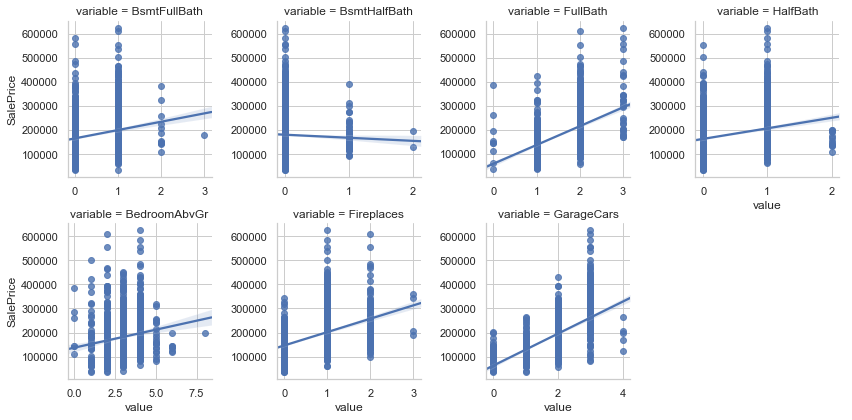

In [119]:
num_train=full_num.iloc[:rows_train,:]
num_test=full_num.iloc[rows_train:,:]
numerical_categorical_features = ['BsmtFullBath', 'BsmtHalfBath',
                                  'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                  'Fireplaces', 'GarageCars']
g_num_reg=plotting_outlier(train,numerical_categorical_features)
g_num_reg.map(sns.regplot, 'value', 'SalePrice')
numericals_train=num_train[numerical_categorical_features+["SalePrice"]]
numericals_test=num_test[numerical_categorical_features]

def Num_but_categoricals(df,numericals_test,numerical_categorical_features):  
    all_median_price = df.SalePrice.median()
    
    num_cate_feat = []
    
    for feat in numerical_categorical_features:
        num_cate_feat.append(feat + "_mean")
        df[feat + "_mean"] = 0
        for uniq in df[feat].unique():
            if uniq is None:
                continue
            mean_price = df.loc[df[feat] == uniq, "SalePrice"].median()
            df.loc[df[feat] == uniq, feat + "_mean"] = mean_price
            numericals_test.loc[numericals_test[feat] == uniq, feat + "_mean"] = mean_price
            
    
        df.loc[df[feat + "_mean"].isnull(), feat + "_mean"] = all_median_price
        numericals_test.loc[numericals_test[feat + "_mean"].isnull(), feat + "_mean"] = all_median_price
    return df,numericals_test

numericals_train,numericals_test= Num_but_categoricals(numericals_train,numericals_test,numerical_categorical_features)
numericals_train.drop("SalePrice", axis=1,inplace=True)
numericals_train.drop(numerical_categorical_features,axis=1,inplace=True)
numericals_test.drop(numerical_categorical_features,axis=1,inplace=True)

print(numericals_train.shape)
print(numericals_test.shape)

In [120]:
numericals_train.head(8)

,BsmtFullBath_mean,BsmtHalfBath_mean,FullBath_mean,HalfBath_mean,BedroomAbvGr_mean,Fireplaces_mean,GarageCars_mean
0,177250.0,163000.0,196500.0,189000.0,169000.0,135000.0,177000.0
1,154000.0,158250.0,196500.0,143000.0,169000.0,190000.0,177000.0
2,177250.0,163000.0,196500.0,189000.0,169000.0,190000.0,177000.0
3,177250.0,163000.0,132000.0,143000.0,169000.0,190000.0,294038.5
4,177250.0,163000.0,196500.0,189000.0,192000.0,190000.0,294038.5
5,177250.0,163000.0,132000.0,189000.0,145250.0,135000.0,177000.0
6,177250.0,163000.0,196500.0,143000.0,169000.0,190000.0,177000.0
7,177250.0,163000.0,196500.0,189000.0,169000.0,201800.0,177000.0


In [121]:
num_bt_cat = numericals_train.append(numericals_test)

In [122]:
full_num.drop('SalePrice',axis=1,inplace=True)
print(full_num.shape)

(2908, 83)


# 11. Transforming Skewed features:
<span style="color:black; font-family:Georgia; font-size:1em;">Skewed feature makes model performance bad because symmetric distribution converge much faster than skewed ones to gaussian. This means that, if we have skewed data, transforming it to gaussian  will make smaller dataset least for using appropriately confidence intervals and tests on parameters. It is also very Robust because Symmetric distributions  have median, mode and mean very close to each other.

In [123]:
numerical_data=full_num
numerical_data=pd.concat([numerical_data,num_bt_cat],axis=1)
numeric_features = list(numerical_data.columns)
from scipy.stats import skew
skew_features = numerical_data[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skews = pd.DataFrame({'skew':skew_features})
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
high_skew = skew_features[abs(skew_features) > 0.70]
skew_index = high_skew.index

for i in skew_index:
    numerical_data[i]= boxcox1p(numerical_data[i], boxcox_normmax(numerical_data[i]+1))


# 12. Data Scaling for the Model
<span style="color:black; font-family:Georgia; font-size:1em;">Data scaling  is necessary so that all the inputs are in a comparable range. The effect of distant is great because the common activation functions such as sigmoid, hyperbolic tangent and gaussian produce result that ranges between [0,1] or [-1,1].It removes geometrical biases towards some of the dimensions of the data vectors. It makes training accurate, and faster.Data scaling  is necessary so that all the inputs are in a comparable range. The effect of distant is great because the common activation functions such as sigmoid, hyperbolic tangent and gaussian produce result that ranges between [0,1] or [-1,1].It removes geometrical biases towards some of the dimensions of the data vectors. It makes training accurate, and faster.</span>

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
    

numerical_data["All_sum"]=numerical_data.sum(axis=1)

In [125]:
numerical_data.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OpenPorchSF-Sq,2ndFlrSF-Sq,BsmtFullBath_mean,BsmtHalfBath_mean,FullBath_mean,HalfBath_mean,BedroomAbvGr_mean,Fireplaces_mean,GarageCars_mean,All_sum
0,-0.773936,1.209298,-0.112802,0.171377,0.725699,-0.356396,1.095194,-0.250432,-0.921497,-0.417994,...,0.613028,1.245139,1.203016,0.250899,0.791683,1.322242,0.336645,-1.004488,0.290095,34.061882
1,0.439290,-0.779178,-0.112802,0.171377,1.210335,-0.356396,-0.818763,3.900976,-0.488885,-0.417994,...,-0.971978,-0.842054,-0.839522,-4.010246,0.791683,-0.762748,0.336645,0.880474,0.290095,-2.881573
2,-0.547315,1.238632,-0.112802,0.171377,0.291730,-0.356396,1.095194,-0.250432,-0.098559,-0.417994,...,0.343218,1.259752,1.203016,0.250899,0.791683,1.322242,0.336645,0.880474,0.290095,41.558219
3,-0.410558,0.970531,-0.112802,0.171377,-0.334933,-0.356396,1.095194,-0.250432,0.143465,3.123656,...,0.228627,1.121734,1.203016,0.250899,-1.052491,-0.762748,0.336645,0.880474,1.792064,16.519118
4,0.136786,1.698216,-0.112802,1.386900,0.629131,-0.356396,1.095194,-0.250432,0.032047,-0.417994,...,0.887991,1.475597,1.203016,0.250899,0.791683,1.322242,1.611101,0.880474,1.792064,87.656210
5,-1.002930,0.512195,9.868612,-2.259669,0.774139,-0.356396,1.095194,-0.250432,-1.296845,-0.417994,...,0.139566,0.857136,1.203016,0.250899,-1.052491,1.322242,-0.979370,-1.004488,0.290095,4.084798
6,1.348220,-0.779178,-0.112802,0.171377,1.842476,-0.356396,1.095194,-0.250432,-0.396761,-0.417994,...,0.560179,-0.842054,1.203016,0.250899,0.791683,-0.762748,0.336645,0.880474,0.290095,58.661033
7,0.031602,1.525660,-0.112802,0.171377,1.003931,1.113497,1.095194,-0.250432,-0.694197,2.888471,...,1.926574,1.397237,1.203016,0.250899,0.791683,1.322242,0.336645,1.284884,0.290095,58.486562
8,-0.217888,0.960817,-0.112802,-1.044146,-1.130210,-0.356396,-0.818763,-0.250432,0.935568,2.753206,...,-0.971978,1.116532,-0.839522,0.250899,0.791683,-0.762748,-1.436512,1.284884,0.290095,0.689540
9,-0.054116,-0.779178,-0.112802,-1.044146,0.989764,-0.356396,1.095194,-0.250432,-0.959327,-0.417994,...,-0.566099,-0.842054,1.203016,0.250899,-1.052491,-0.762748,-1.436512,1.284884,-1.013973,-38.974698


In [126]:
full_data=pd.concat([numerical_data,full_categorical,House_feat,data],axis=1)
print(full_data.shape)

(2908, 433)


In [127]:
full_data.drop('Utilities',axis=1,inplace=True)

In [128]:
full_data.isnull().sum().sum()

0

In [129]:
full_data.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,WoodDeckSF_3,WoodDeckSF_4,LotArea_1,LotArea_2,LotArea_3,LotArea_4,LotArea_5,LotArea_6,LotArea_7,LotArea_8
0,-0.773936,1.209298,-0.112802,0.171377,0.725699,-0.356396,1.095194,-0.250432,-0.921497,-0.417994,...,0,0,0,0,1,0,0,0,0,0
1,0.439290,-0.779178,-0.112802,0.171377,1.210335,-0.356396,-0.818763,3.900976,-0.488885,-0.417994,...,0,0,0,0,0,0,1,0,0,0
2,-0.547315,1.238632,-0.112802,0.171377,0.291730,-0.356396,1.095194,-0.250432,-0.098559,-0.417994,...,0,0,0,0,0,0,0,1,0,0
3,-0.410558,0.970531,-0.112802,0.171377,-0.334933,-0.356396,1.095194,-0.250432,0.143465,3.123656,...,0,0,0,0,0,0,1,0,0,0
4,0.136786,1.698216,-0.112802,1.386900,0.629131,-0.356396,1.095194,-0.250432,0.032047,-0.417994,...,0,0,0,0,0,0,0,0,0,1
5,-1.002930,0.512195,9.868612,-2.259669,0.774139,-0.356396,1.095194,-0.250432,-1.296845,-0.417994,...,0,0,0,0,0,0,0,0,0,1
6,1.348220,-0.779178,-0.112802,0.171377,1.842476,-0.356396,1.095194,-0.250432,-0.396761,-0.417994,...,0,0,0,0,0,0,1,0,0,0
7,0.031602,1.525660,-0.112802,0.171377,1.003931,1.113497,1.095194,-0.250432,-0.694197,2.888471,...,0,0,0,0,0,0,0,1,0,0
8,-0.217888,0.960817,-0.112802,-1.044146,-1.130210,-0.356396,-0.818763,-0.250432,0.935568,2.753206,...,0,0,0,1,0,0,0,0,0,0
9,-0.054116,-0.779178,-0.112802,-1.044146,0.989764,-0.356396,1.095194,-0.250432,-0.959327,-0.417994,...,0,0,0,1,0,0,0,0,0,0


In [130]:
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

In [131]:
train_full=full_data.iloc[:rows_train,:]
test_full=full_data.iloc[rows_train:,:]
print(train_full.shape)
print(test_full.shape)

(1449, 432)
(1459, 432)


In [132]:
X_train=train_full.values
X_train_full=X_train
y=np.log1p(train.SalePrice)
y=y.values
y_train=y
y_train_full=y
X_test=test_full.values



# 13. Building Up ANN Model
## 13.1. Creating Placeholder and Initializing  weights and biases

In [133]:
import tensorflow as tf

n_features = X_train.shape[1]


Xs = tf.placeholder(dtype=tf.float32, shape=[None, n_features])
Ys = tf.placeholder(dtype=tf.float32, shape=[None])

# Initializers
sigma = 0.001
beta=.001
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="truncated_normal", scale=sigma)
bias_initializer = tf.zeros_initializer()

## 13.2. Function For weights and biases

In [134]:
def W_and_b(in_size,out_size):
    
    W = tf.Variable(weight_initializer([in_size, out_size]))
    b = tf.Variable(bias_initializer([out_size]))
    return W ,b

## 13.3 Function adding layer

In [135]:
def layer(data,in_dim,out_dim):
    W,b=W_and_b(in_dim,out_dim)
    return tf.add(tf.matmul(data, W), b) , W

## 13.4 Main Model 
### Model description 
<span style="color:black; font-family:Georgia; font-size:1em;">In input layer softmax function is used to reduce the noise of data. It gives probabilities distribution of the event over ‘n’ different events hence smooth the data. In hidden layer Relu and their combinations are used. As our model is consist of a lot of neurons. Using a sigmoid or tanh will cause almost all neurons to fire from every layer. That means almost all activations will be processed to describe the output of a network. This is computationally costly. We would basically want a few neurons in the network to not activate and fire to make the activations efficient. To resolve dying neuron emerged from horizontal line of relu function; leaky relu has been used. A single-layer neural network can only be used to represent linearly separable functions. But our given problem are not linearly connected with target value. So we have to use multiple layers. As we have so many attributes for a target value. So to represent each attribute we have given around 350-200-100-50 nodes per layer.

<span style="color:black; font-family:Georgia; font-size:1em;">All the specification of the ANN model is given in the last portion of the report</span>


In [136]:
def ANN_MODEL(X):
    input_layer,W0 = layer(Xs,n_features,350)
    input_layer=tf.nn.softmax(input_layer)
    # Hidden layer
    hidden_1, W1= layer(input_layer,350,200)
    hidden_1 = tf.nn.relu(hidden_1)
    
    hidden_2, W2=layer(hidden_1,200,100)
    hidden_2 = tf.nn.relu(hidden_2)
    
    hidden_3,W3=layer(hidden_2,100,50)
    hidden_3=tf.nn.leaky_relu(hidden_3)
    
    
    hidden_4,W4 = layer(hidden_3,50,1)
    hidden_4=tf.transpose(hidden_4)
    out=hidden_4
     
    return out,W0,W1,W2,W3,W4

out,W0,W1,W2,W3,W4= ANN_MODEL(Xs)

parameters=[W0,W1,W2,W3,W4]

## 13.5 Regularization 
<span style="color:black; font-family:Georgia; font-size:1em;">To avoid Overfitting problem I deployed l2 regularization method. This function tries to generalize the model. One way to implement regularization is to add a term to the cost function that penalizes overly complex models. We need to normalize the other part of our cost function to ensure that the ratio of the two error terms does not change with respect to the number of examples. We can introduce a regularization parameter beta . Higher values of beta will impose bigger penalties for high model complexity..</span>

In [137]:
def l2_regularizer(cost, l2_beta, parameters):
    regularizer = 0
    for weight in parameters:
        regularizer += tf.nn.l2_loss(weight)

    cost = tf.reduce_mean(cost + l2_beta * regularizer)

    return cost

## 13.6 Cost Defining and other Hyperparameters

In [138]:
# Cost function
loss = tf.reduce_mean(tf.squared_difference(out, Ys))
#loss=tf.losses.absolute_difference(out, Ys)
cost = l2_regularizer(loss, beta, parameters)
# Optimizer

lr=.02
print("Learning_rate= ",lr)
opt = tf.train.AdadeltaOptimizer(learning_rate=lr).minimize(cost)
# Fitting the neural network
batch_size = 70
print("batch_size = ",batch_size)
epochs = 5000
print("epochs= ",epochs)
c_t=[]
display_step=300

Learning_rate=  0.02
batch_size =  70
epochs=  5000


## 13.7 Running The session

## Basic Model Configuration 	
| Layer No. | Layer Type | No. of Node | Activation Function |
| --- | --- | --- | --- |
| 1 | Input | number of features | - |
| 2 | Hidden | 350 | Softmax |
| 3 | Hidden | 200 | Relu |
| 4 | Hidden | 100 | Relu |
| 4 | Hidden | 50 | LeakyRelu |
| 5 | Output | 1 | Linear |


## Cross Validation::
### Why Cross validation required:
####  5 fold cross validation has been implemented to tune the parameters and to observe how the model performs in different conditions. It can demonstrate when the model in underfitting and overfitting.  It helps us for the better use of our data, and it gives us much more information about our algorithm performance. It will let us know  how accurately a predictive model will perform in general  practice.

In [66]:
kf = KFold(5)
every_fold_trn=[]
every_fold_val=[]
rmse_val=[]
fold=0
for trn, tst in kf.split(X_train_full):
    Avg_Cost=[]
    Avg_Cost_val=[]
    fold+=1
    print("Fold #{}".format(fold))
    X_train = X_train_full[trn]
    y_train = y_train_full[trn]
    X_val = X_train_full[tst]
    y_val = y_train_full[tst]
    with tf.Session(config=tf.ConfigProto(allow_soft_placement=True)) as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(epochs):
            avg_cost = 0.0
            total_batch = int(len(X_train) / batch_size)
            x_batches = np.array_split(X_train, total_batch)
            y_batches = np.array_split(y_train, total_batch)
            for i in range(total_batch):
                batch_x = x_batches[i]

                batch_y= y_batches[i]
                _, c = sess.run([opt, cost], feed_dict={Xs: batch_x, Ys: batch_y })
                avg_cost += c / total_batch

                if i%10==0:

                    step = epoch * total_batch + i
                    

            if epoch % display_step == 0:
                print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
            c_val = sess.run(loss, feed_dict={Xs: X_val, Ys: y_val })
            Avg_Cost_val.append(c_val)    
            Avg_Cost.append(avg_cost)
        y_prd=sess.run(out,feed_dict={Xs: X_val})
    rmse_val.append(rmse(y_val,np.transpose(y_prd)))
    print("Optimization Finished for fold No. " +str(fold))
    every_fold_trn.append(Avg_Cost)
    every_fold_val.append(Avg_Cost_val)
average_rmse=np.mean(rmse_val)
print(average_rmse)

Fold #1
Epoch: 0001 cost= 144.557773590
Epoch: 0301 cost= 0.022369926
Epoch: 0601 cost= 0.019055272
Epoch: 0901 cost= 0.017939878
Epoch: 1201 cost= 0.016957840
Epoch: 1501 cost= 0.016199305
Epoch: 1801 cost= 0.015593610
Epoch: 2101 cost= 0.015094207
Epoch: 2401 cost= 0.014678086
Epoch: 2701 cost= 0.014326442
Epoch: 3001 cost= 0.014022502
Epoch: 3301 cost= 0.013758065
Epoch: 3601 cost= 0.013527089
Epoch: 3901 cost= 0.013323900
Epoch: 4201 cost= 0.013144170
Epoch: 4501 cost= 0.012984256
Epoch: 4801 cost= 0.012841531
Optimization Finished for fold No. 1
Fold #2
Epoch: 0001 cost= 144.613338470
Epoch: 0301 cost= 0.020891897
Epoch: 0601 cost= 0.017817768
Epoch: 0901 cost= 0.016355806
Epoch: 1201 cost= 0.015492394
Epoch: 1501 cost= 0.014825808
Epoch: 1801 cost= 0.014263902
Epoch: 2101 cost= 0.013796443
Epoch: 2401 cost= 0.013397290
Epoch: 2701 cost= 0.013051998
Epoch: 3001 cost= 0.012756853
Epoch: 3301 cost= 0.012505862
Epoch: 3601 cost= 0.012292543
Epoch: 3901 cost= 0.012113354
Epoch: 4201 c

In [67]:
len(every_fold_val[0])

5000

In [68]:
best_rmse= np.min(rmse_val)
print(best_rmse)

0.1161322122710741


## 13.8 Plotting the learning curve for training and validation

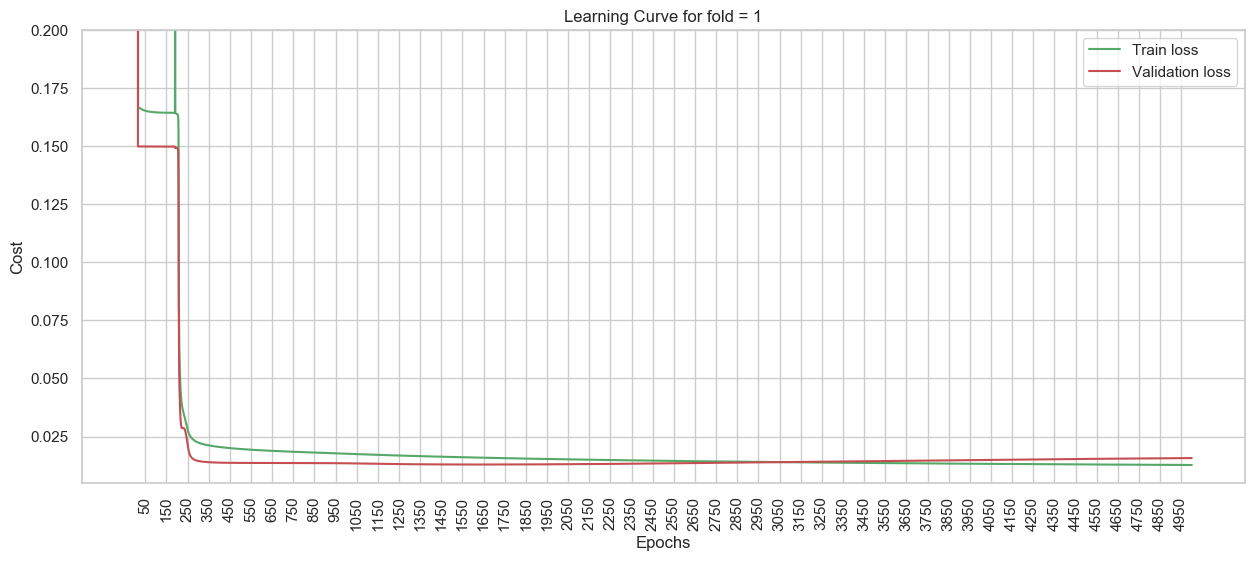

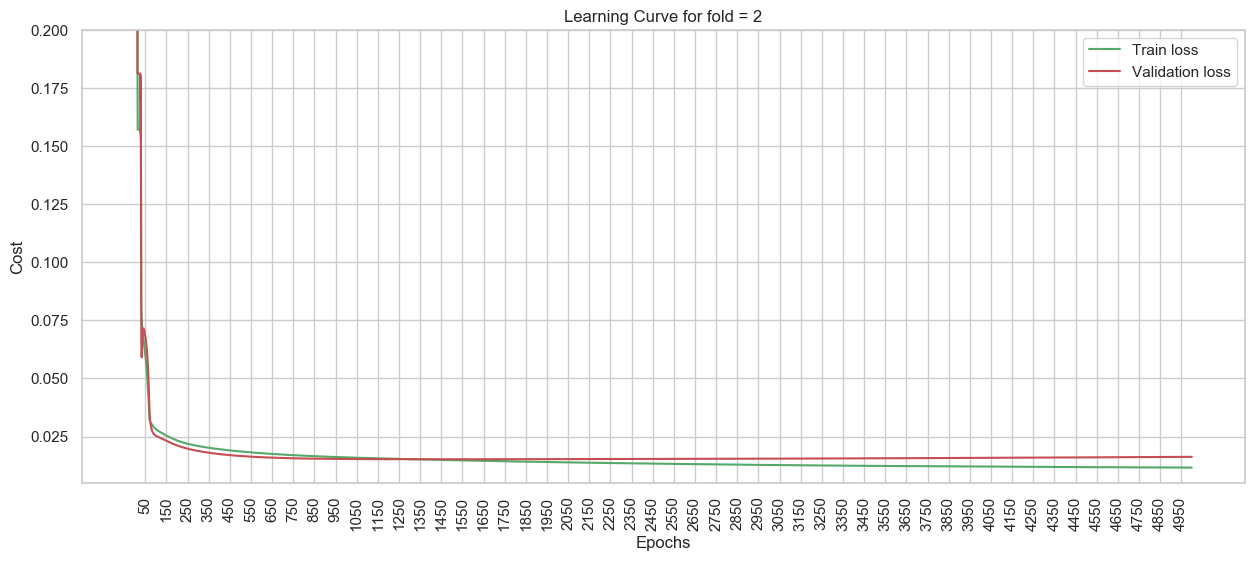

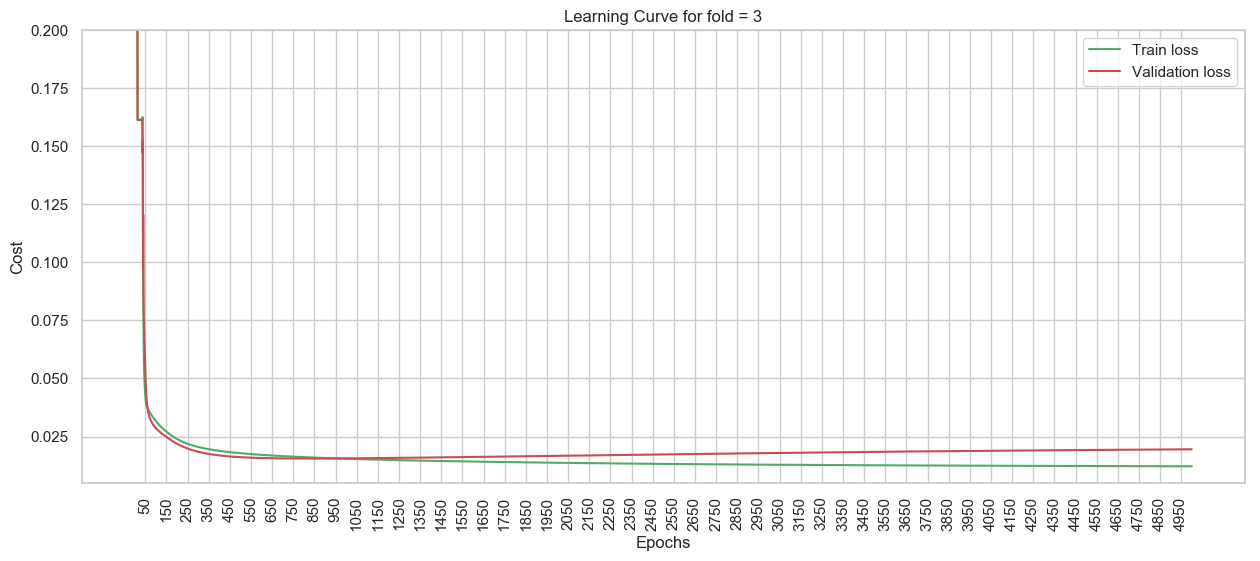

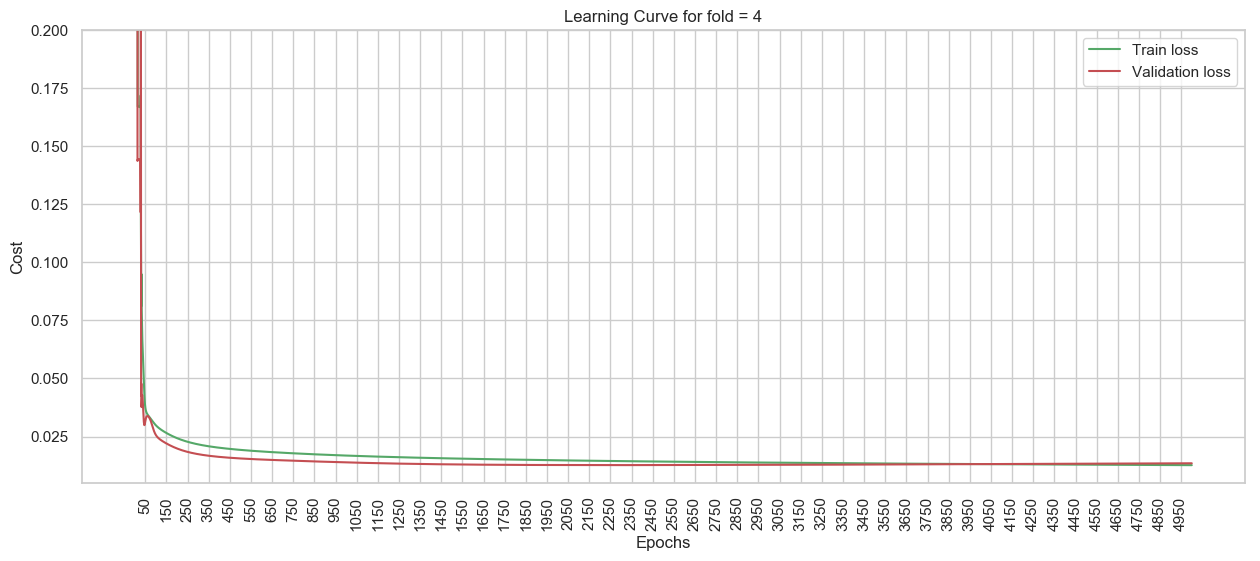

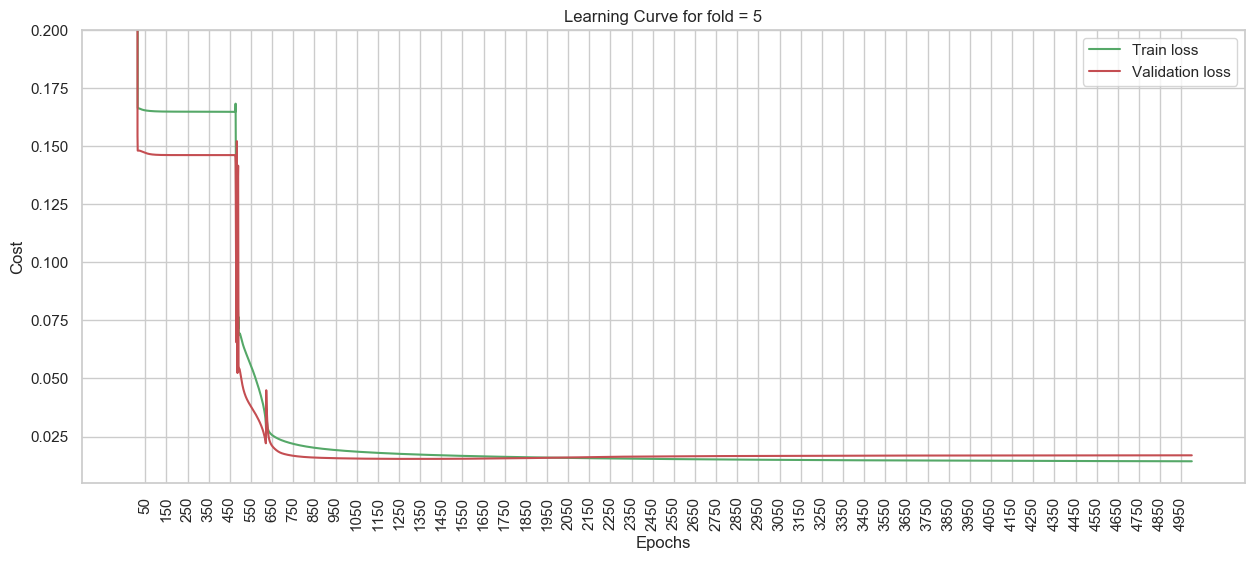

In [69]:
for i in range(len(rmse_val)):
    plt.figure(num=None, figsize=(15,6), dpi=100, facecolor='w', edgecolor='k')
    plt.rcParams.update({'figure.max_open_warning': 0})
    plt.ylim((.005,.20))
    
    plt.xticks(np.arange(50, epochs, step=100),rotation=90)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Learning Curve for fold = '+str(i+1))
    plt.plot(list(range(1,epochs+1,1)),every_fold_trn[i],color='g',label="Train loss")
    plt.plot(list(range(1,epochs+1,1)),every_fold_val[i],color='r',label="Validation loss")
    plt.legend() 


## 13.9 Description and Decision On Validation and Train:
1. We can observe where overfitting occurs. Overfitting actually occurs if the training loss goes under the validation loss even though the validation is still dropping. It is the sign that network is learning the patterns in the train set that are not applicable in the validation done. In a short note we can say::

            Overfitting : training loss << validation loss

            Underfitting : training loss >> validation loss

            Just right :   training loss ~ validation loss

2. There may be some cases where validation loss is less than training loss constantly. This is the case where difference is tiny (< 1%), it is feasible that there is no problem. The train set may contain more difficult pattern than the validation set, therefore giving a higher loss. Data split could be such that I have a simpler validation set than a train set and hence my network seems to be doing far much better on the validation set than it did on the training set.

3. We can find correct epoch number from validation loss. We can train the test set upto starting of overfitting.




In [ ]:
(Avg_Cost[0:30])

# 13.10 Hyperparameter Tuning:
### There are some parameters in artificial neural network model. By tuning these parameters we can reach our desired output. In my model learning rate, optimizer, epoch number etc. parameters have been tuned. The result is given in following table:

| Number of Layer | Batch size | Optimizer | learning rate | Epochs | Corresponding validation RMSE |
| --- | --- | --- | --- | --- | --- |
| 3 | 100 | AdaDelta | 0.01 | 2000 | 0.1235 |
| 3 | 50 | AdaDelta | 0.01 | 2000 |0.1141 |
| 3 | 100 | Adam | 0.01 | 3000 |0.3829 |
| 3 | 100 | Adam | 0.1 | 2000 |0.3821 |
| 3 | 100 | RMSProp | 0.1 | 2000 |0.7711 |
| 3 | 200 | Gradient Descent | 0.1 | 3500 |0.3790 |
| 4 | 200 | AdaDelta | 0.01 | 3000 |0.1134 |
| 4 | 200 | AdaDelta | 0.01 | 5000 |0.1161 |
| 4 | 70 | AdaDelta | 0.02 | 5000 |0.1113 |

### Observation in changing layer:

#### When 3 layers are used there were still some patterns to recognize for the model.This can be verified by the kaggle result. This result fluctuates between 0.13 to 0.15. Increasing the layer number to 4 from 3 the performance becomes more accurate as it gives lesser rmse value than before. If I go more deeper the model actually memorizes the train set causing overfitting problem. 

# 13.11 Training the Whole Dataset for Submission:
#### We have implemented all the feature engineering , scaling , normalization etc. We also observed the relation between validation and train loss and get to know about where model is overfitting. Now we will train whole engineered training set for the Kaggle Submission.

In [70]:
batch_size=70
print("batch_size = ",batch_size)
epochs = 2300
print("epochs= ",epochs)
c_t=[]
display_step=90
# Run
with tf.Session(config=tf.ConfigProto(allow_soft_placement=True)) as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(epochs):
        avg_cost = 0.0
        total_batch = int(len(X_train_full) / batch_size)
        x_batches = np.array_split(X_train_full, total_batch)
        y_batches = np.array_split(y_train_full, total_batch)
        for i in range(total_batch):
            batch_x = x_batches[i]
            batch_y= y_batches[i]
            _, c = sess.run([opt, cost], feed_dict={Xs: batch_x, Ys: batch_y })
            avg_cost += c / total_batch

            if i%10==0:
                
                step = epoch * total_batch + i
                
            
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

#Predicting the movement of the stock
    pred = sess.run(out, feed_dict={Xs: X_test})
    pred=np.transpose(pred)

pred_exp=np.exp(pred)
id_tst=pd.read_csv("test.csv")
submission_csv=pd.DataFrame()  
submission_csv['Id']=id_tst['Id']
pred_sub_exp=np.exp(pred)-1
submission_csv['SalePrice']=pred_sub_exp
submission_csv.to_csv('submission_csv_NN_SS.csv', index=False)

batch_size =  70
epochs=  2300
Epoch: 0001 cost= 144.638227844
Epoch: 0091 cost= 0.035105490
Epoch: 0181 cost= 0.025147466
Epoch: 0271 cost= 0.021457535
Epoch: 0361 cost= 0.019901285
Epoch: 0451 cost= 0.019012011
Epoch: 0541 cost= 0.018406092
Epoch: 0631 cost= 0.017955598
Epoch: 0721 cost= 0.017602265
Epoch: 0811 cost= 0.017315383
Epoch: 0901 cost= 0.017076748
Epoch: 0991 cost= 0.016874050
Epoch: 1081 cost= 0.016699041
Epoch: 1171 cost= 0.016545664
Epoch: 1261 cost= 0.016409784
Epoch: 1351 cost= 0.016288222
Epoch: 1441 cost= 0.016178569
Epoch: 1531 cost= 0.016078762
Epoch: 1621 cost= 0.015987575
Epoch: 1711 cost= 0.015903652
Epoch: 1801 cost= 0.015826314
Epoch: 1891 cost= 0.015754516
Epoch: 1981 cost= 0.015687654
Epoch: 2071 cost= 0.015625447
Epoch: 2161 cost= 0.015567339
Epoch: 2251 cost= 0.015512909
Optimization Finished!


In [71]:
print(pred_sub_exp[0:20])

[[122767.38 ]
 [152004.08 ]
 [189490.53 ]
 [190327.81 ]
 [189899.02 ]
 [167418.1  ]
 [167425.9  ]
 [160669.67 ]
 [187465.52 ]
 [126209.64 ]
 [185250.72 ]
 [ 97602.11 ]
 [101535.   ]
 [142720.64 ]
 [118977.375]
 [356608.34 ]
 [249985.94 ]
 [304172.28 ]
 [278997.16 ]
 [455651.5  ]]


<h2><center><span style="color:black; font-family:Times New Roman; font-size:01.4em;">13.12. Reason to choose above Model:</span></center></h2>

| Parameters |Values | Reason |
| --- | --- | --- |
| weight_initializer | Normal distribution | Assigning random values to weights is better than just assigning 0.  If weights are initialized with very high values the term np.dot(W,X)+b becomes higher. Activation function maps it to 1 gradient changes slowly and learning takes a lot of time. |
| bias_initializer | zeros | In general practice biases are initialized with 0. |
| optimizer | AdaDelta | AdaDelta is the extension of AdaGrad. It improves manual selection of learning rate.  if the initial gradients are large, they won’t affect the learning rate. AdaDelta does not focus on updating the learning rate for each step at all. |
| cost | mean square | As our problem is regression it is good practice to use mean square loss |
| Learning rate | 0.01 | In this learning rate the model learn very well. If we reduce the learning rate weight update becomes slow and in the end some under fitting problem is introduced. |
| Batch_size | 70  | Due to the memory constraint batch size is used. If batch size is increased to some extent it is observed that initial cost is greater than as usual. It takes large number of epochs to converge desire value. But while decreasing the batch size run time becomes slower as more data are fed into the model  |
| epochs | 2300-2500 | It is very much cleared from the validation set that epoch must less than 2500. If we increase the epochs greater than we used, overfitting problem occurs. |

## Current Kaggle Score:
<img src="score.PNG">

#### Current Kaggle score is 0.11958. At the time of submission ranking was 887 among all the parcipitants.

# 14. Other Regression Algorithms:

### Till now we have seen the regression model using deep neural network. There are several methods for regression. We are not going to escape those others algorithm. Some of regression algorithms are implemented in the following sections.

#### Boosting related algorithm such as xgboost gradientboosting basically tree based model. So it will not be feasible idea to use one hot encoding as it will grow trees splitting regarding some criteria. So we eliminated all the one hot encoding and bring the label encoding into the account.

In [139]:
boosting_data=pd.concat([full_ord,full_bst,num_bt_cat,numerical_data,House_feat,data_int],axis=1)
boosting_data.head(5)

,LotShape,Utilities,LandSlope,OverallCond,OverallQual,ExterCond,ExterQual,BsmtCond,BsmtExposure,BsmtFinType1,...,BsmtYes,fireplaceYes,Neighborhood_Good,2ndFlrSF,GrLivArea,YearBuilt,GarageYrBlt,GarageArea,WoodDeckSF,LotArea
0,3,3,3,4,4,3,5,3,3,5,...,1,0,0.0,3,2,7,3.0,2.0,1,3
1,3,3,3,2,2,3,2,3,6,2,...,1,1,0.0,1,2,6,2.0,1.0,1,5
2,4,3,3,4,4,3,5,3,3,5,...,1,1,0.0,3,2,7,3.0,2.0,1,6
3,4,3,3,4,4,3,2,4,3,2,...,1,1,1.0,3,2,3,3.0,2.0,1,5
4,4,3,3,4,6,3,5,3,4,5,...,1,1,1.0,4,3,7,3.0,2.0,1,8


In [140]:
print(boosting_data.shape)
train_bst=boosting_data.iloc[:rows_train,:]
test_bst=boosting_data.iloc[rows_train:,:]
print(train_bst.shape)
print(test_bst.shape)

(2908, 185)
(1449, 185)
(1459, 185)


In [141]:
X_train=train_bst.values
X_train_full=X_train
y=np.log1p(train.SalePrice)
y=y.values
y_train=y
y_train_full=y
X_test=test_bst.values
print(y.shape)

(1449,)


In [142]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor


gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01,
                                   max_depth=5, max_features='auto',
                                   min_samples_leaf=10, min_samples_split=30, 
                                   loss='quantile', random_state =42)
                                   

                                       
xgboost = XGBRegressor(learning_rate=0.02,n_estimators=2500,
                                     max_depth=3, min_child_weight=1.8,
                                     gamma=0.01, subsample=0.5,
                                     colsample_bytree=0.8,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=30,
                                     reg_alpha=0.1)

gbr_model_full_data = gbr.fit(X_train_full, y_train_full)

xgb_model_full_data = xgboost.fit(X_train_full, y_train_full)



xgb_predict=xgb_model_full_data.predict(X_test)

gbr_predict=gbr_model_full_data.predict(X_test)
pred_exp_xgb= np.exp(xgb_predict)-1

pred_exp_gbr= np.exp(gbr_predict)-1

id_tst=pd.read_csv('test.csv')
submission_xgb=pd.DataFrame()
submission_gbr=pd.DataFrame()
submission_xgb['Id']=id_tst['Id']
submission_gbr['Id']=id_tst['Id']
submission_xgb['SalePrice']= pred_exp_xgb
submission_gbr['SalePrice']= pred_exp_gbr

In [143]:
t = Texttable()
t.add_rows([['Model', 'Prediction'], ['XGBoost', pred_exp_xgb[0:20]], ['GradientBoost', pred_exp_gbr[0:20]],
           ])
print(t.draw())

+---------------+--------------------------------------------------------------+
|     Model     |                          Prediction                          |
+===============+==============================================================+
| XGBoost       | [127459.75 161878.4  183175.08 195339.95 185492.39 167541.08 |
|               | 173774.3                                                     |
|               |  167187.22 171444.23 128278.49 181679.92  90254.64 103313.81 |
|               | 148304.                                                      |
|               |  112935.13 365588.38 256776.2  287786.   257942.03 506499.5  |
|               | ]                                                            |
+---------------+--------------------------------------------------------------+
| GradientBoost | [134950.88443492 175066.12379448 201853.25646537             |
|               | 204987.98353513                                              |
|               |  205311.34

In [144]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
EN = ElasticNet(alpha=0.0003, l1_ratio=1.25)
EN.fit(X_train_full, y_train_full)
EN_pred = np.exp(EN.predict(X_test))-1

In [145]:
LASSO = Lasso(alpha = 0.00015)
LASSO.fit(X_train_full, y_train_full)
LASSO_pred = np.expm1(LASSO.predict(X_test))

In [146]:
t = Texttable()
t.add_rows([['Model', 'Prediction'], ['ElesticNet', EN_pred[0:20]], ['LASSO', LASSO_pred[0:20]]])
print(t.draw())

+------------+-----------------------------------------------------------------+
|   Model    |                           Prediction                            |
+============+=================================================================+
| ElesticNet | [115364.5367927  155910.52588766 182855.2084341                 |
|            | 190100.04644347                                                 |
|            |  195519.03220136 166711.95513284 169281.32351915                |
|            | 157748.34154819                                                 |
|            |  187533.15318122 121558.64588723 180504.90902262                |
|            | 92387.72224178                                                  |
|            |   96400.49633956 145338.87778663 113943.84707519                |
|            | 364469.33872661                                                 |
|            |  250023.77552691 302594.50141726 279519.91383075                |
|            | 495923.151148

In [147]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train_full, y_train_full)
predictions_lin_reg = model.predict(X_test)
id_tst=pd.read_csv('test.csv')
submission_csv_lin=pd.DataFrame()  
submission_csv_lin['Id']=id_tst['Id']
pred_sub_lin_exp=np.exp(predictions_lin_reg)-1
submission_csv_lin['SalePrice']=pred_sub_lin_exp
submission_csv_lin.to_csv('submission_csv_lin.csv', index=False)
print(pred_sub_lin_exp[:15])

[109644.10411521 155071.4518369  182085.3249964  191532.48581803
 197765.78584378 168281.46581208 166758.14457898 161030.63664529
 178287.98828367 121744.34624236 175079.33283699  92539.9874525
  96174.6820645  145887.70277557 112893.97501011]


In [150]:
avg_pred=(0.20*pred_exp_xgb+0.10*pred_exp_gbr+0.2*EN_pred+0.50*LASSO_pred)
print(avg_pred[:20])


[119044.86007424 157819.78939097 184655.19278911 191978.50804598
 194473.9009965  168814.69257559 170672.33027384 161932.38412883
 184663.01701841 125324.85609655 180747.12916837  93036.88517567
  99258.44821095 147200.23094975 114391.55136441 366441.73251975
 253439.01405703 299700.36986013 276806.60695733 511218.74312273]


In [149]:
all_algo=pd.DataFrame()
all_algo['Id']=id_tst['Id']
all_algo['SalePrice']= avg_pred
all_algo.to_csv('submission_csv_boosting.csv', index=False)

## Kaggle Score Using other algorithm:
<img src="boosting_score.PNG">

<h2><center><span style="color:black; font-family:Times New Roman; font-size:01.4em;">15. Discussion </span></center></h2>

<span style="color:black; font-family:Georgia; font-size:1em;">Model Performance vastly depends on data preprocessing. A good data preprocessing can bring good accuracy in the model. This artificial neural network model represents a good solution of Houseprice Kaggle challenge. Tuning the parameter like learning rate, epochs, batch_sizes it is possible to perform good for unseen data. In above tuned model it gives stable performance. A good observation can be made that changing optimizer bring drastic change in model performance. Learning rate helps to know how fast the model converging to the desired value. Cost function dictates about the current situation of the convergence. Batch size makes run time faster than the not providing batches.

<span style="color:black; font-family:Georgia; font-size:1em;"> Other boosting algorithm performs extremely well. LASSO and xgboost outperform other algorithms. 

<h2><center><span style="color:black; font-family:Times New Roman; font-size:01.4em;">16.Reference: </span></center></h2>

#### Data Description:
[1]  Dean De Cock, “Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project”, Journal of Statistics Education, Volume 19, Number 3(2011).

#### Data Preprocessing:
[2] https://zhuanlan.zhihu.com/p/36324776
[3] https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f
[4] https://www.hackerearth.com/practice/machine-learning/machine-learning-projects/python-project/tutorial/
[5] https://www.datacamp.com/community/tutorials/categorical-data
[6] https://math.stackexchange.com/questions/1339492/the-normal-distribution-is-a-common-model-of-randomness

#### ANN Model:
[7] TensorFlow Machine Learning Cookbook. A Packt Publishing Book. By Nick McClure
[8] https://medium.com/@rajatgupta310198/getting-started-with-neural-network-for-regression-and-tensorflow-58ad3bd75223
[9] https://medium.com/coinmonks/loss-optimization-in-tensorflow-c4336629504f
[10] https://machinelearningmastery.com/improve-deep-learning-performance/